# exploratory data analysis - bidding zone NO1 and neighboring zones for the year of 2022

In [1]:
# importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization


## About the dataset

Hourly electricity prices and external factors for bidding zone NO1 (Norway Østlandet) and neightbouring zones (NO2, NO3, NO5 and SE3).

**Source of the datasets data::** https://transparency.entsoe.eu/dashboard/show

**Attribute information:**

**Target feature:** 	**Day-ahead Price** Spot (day-ahead) market prices in the currency Euro per MWh (megawatt-hour).
1.	**Start MTU (UTC):** Start datetime of the interval for the measured values
2.	**Start MTU (UTC):** End time of the interval for the measured values
3.	**Actual Total Load:** The power consumption in each zone per MW (megawatt)
4.	**Biomass:** Energy production in MW  from Biomass.
5.	**Fossil Gas:** Energy production in MW  from Fossil Gas.
6.	**Hydro Run-of-river and poundage:** Energy production in MW  from Hydro Run-of-river and poundage.
7.	**Hydro Water Reservoir:** Energy production in MW  from Hydro Run-of-river and poundage.
8.	**Wind Onshore:** Energy production in MW  from onshore wind.
9.	**Hydro Pumped Storage Aggregated:** Energy production in MW  from Hydro Pumped Storage Aggregated.
10.	**Hydro Run-of-river and poundage:** Energy production in MW  from Hydro Run-of-river and poundage
11.	**Other renewable:** Energy production in MW  from Other renewable.
12.	**Marine:** Energy production in MW  from Marine.
13.	**Solar:** Energy production in MW  from Solar.
14.	**CBF BZN|x > BZN|y [MWh]:**  Cross-border physical flow in MWH (mega watt hour), zone x is export zone and zone y is import zone.
15.	**Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh]:** Stored Energy Value in Water Reservoirs and Hydro Storage Plants measured in MwH (mega watt hour)

## Importing dataset and printing out the resulting dataframe

In [2]:
# reding in the dataset to a dataframe
df = pd.read_csv('../datasets/no1_aggregated/no1_2020_to_2022_aggregated.csv')

# printing out the 5 first rows of the dataset
df.head()

,start MTU (UTC),end MTU (UTC),Day-ahead Price [EUR/MWh] BZN|NO1,Day-ahead Price [EUR/MWh] BZN|NO2,Day-ahead Price [EUR/MWh] BZN|NO3,Day-ahead Price [EUR/MWh] BZN|NO5,Day-ahead Price [EUR/MWh] BZN|SE3,Actual Total Load [MW] - BZN|NO1,Actual Total Load [MW] - BZN|NO2,Actual Total Load [MW] - BZN|NO3,...,CBF BZN|NO1 > BZN|NO3 [MW],CBF BZN|NO5 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO5 [MW],CBF BZN|SE3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|SE3 [MW],Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO1,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO2,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO3,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO5,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|SE3
0,2020-01-01 00:00:00,2020-01-01 01:00:00,31.77,31.77,28.45,31.77,28.45,4333.0,4139.0,3016.0,...,0.0,1449.0,0.0,391,0,4012000.0,24273000.0,5588000.0,11211000.0,2220000.0
1,2020-01-01 01:00:00,2020-01-01 02:00:00,31.57,31.57,27.90,31.57,27.90,4250.0,4114.0,2945.0,...,0.0,1283.0,0.0,348,0,4012000.0,24273000.0,5588000.0,11211000.0,2220000.0
2,2020-01-01 02:00:00,2020-01-01 03:00:00,31.28,31.28,27.52,31.28,27.52,4167.0,4030.0,3032.0,...,6.0,962.0,0.0,500,0,4012000.0,24273000.0,5588000.0,11211000.0,2220000.0
3,2020-01-01 03:00:00,2020-01-01 04:00:00,30.72,30.72,27.54,30.72,27.54,4145.0,4032.0,2988.0,...,6.0,767.0,0.0,610,0,4012000.0,24273000.0,5588000.0,11211000.0,2220000.0
4,2020-01-01 04:00:00,2020-01-01 05:00:00,30.27,30.27,26.55,30.27,26.55,4222.0,4032.0,2848.0,...,22.0,642.0,0.0,909,0,4012000.0,24273000.0,5588000.0,11211000.0,2220000.0


In [3]:
# printing out the 5 last rows of the dataset
df.tail()

,start MTU (UTC),end MTU (UTC),Day-ahead Price [EUR/MWh] BZN|NO1,Day-ahead Price [EUR/MWh] BZN|NO2,Day-ahead Price [EUR/MWh] BZN|NO3,Day-ahead Price [EUR/MWh] BZN|NO5,Day-ahead Price [EUR/MWh] BZN|SE3,Actual Total Load [MW] - BZN|NO1,Actual Total Load [MW] - BZN|NO2,Actual Total Load [MW] - BZN|NO3,...,CBF BZN|NO1 > BZN|NO3 [MW],CBF BZN|NO5 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO5 [MW],CBF BZN|SE3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|SE3 [MW],Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO1,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO2,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO3,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO5,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|SE3
26299,2022-12-31 19:00:00,2022-12-31 20:00:00,123.61,123.61,23.82,123.61,11.57,4650.0,4333.0,3612.0,...,0.0,43.0,0.0,2083,0,3915448.0,21384042.0,5038234.0,12014136.0,1579000.0
26300,2022-12-31 20:00:00,2022-12-31 21:00:00,121.09,121.09,23.93,121.09,14.89,4573.0,4270.0,3605.0,...,0.0,24.0,0.0,2097,0,3915448.0,21384042.0,5038234.0,12014136.0,1579000.0
26301,2022-12-31 21:00:00,2022-12-31 22:00:00,120.00,120.00,23.75,120.00,9.94,4453.0,4294.0,3479.0,...,0.0,41.0,0.0,2007,0,3915448.0,21384042.0,5038234.0,12014136.0,1579000.0
26302,2022-12-31 22:00:00,2022-12-31 23:00:00,119.98,119.98,23.56,119.98,4.84,4389.0,4282.0,3415.0,...,0.0,0.0,29.0,2119,0,3915448.0,21384042.0,5038234.0,12014136.0,1579000.0
26303,2022-12-31 23:00:00,2023-01-01 00:00:00,119.32,119.32,23.35,119.32,2.01,4444.0,4182.0,3346.0,...,0.0,0.0,12.0,1612,0,3915448.0,21384042.0,5038234.0,12014136.0,1579000.0


In [4]:
# printing out the shape of the dataset
df.shape

(26304, 58)

We can see that the time series data is measured in intervals of 1 hour, and that we have 26304 rows starting at the start of 2020, ending at the end of 2022. Furthermore, we see that we have 58 columns which each belong to one of the 15 feature categories or the target feature.

In [5]:
# printing out info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 58 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   start MTU (UTC)                                                                26304 non-null  object 
 1   end MTU (UTC)                                                                  26304 non-null  object 
 2   Day-ahead Price [EUR/MWh] BZN|NO1                                              26304 non-null  float64
 3   Day-ahead Price [EUR/MWh] BZN|NO2                                              26304 non-null  float64
 4   Day-ahead Price [EUR/MWh] BZN|NO3                                              26304 non-null  float64
 5   Day-ahead Price [EUR/MWh] BZN|NO5                                              26304 non-null  float64
 6   Day-ahead Price [EUR/M

We Can see that the datetime columns are of the data type object, so we ned to convert it into the data type datetime. The remaining values are numerical data and have appropriate data types.

We also notice that the value onthe 'non-null count' of allot of the columns are less than the size of the dataset (26304), and we therefore know that allot of the features have missing values. We should therefore investigate which values are misssing, and handle the missing values accordingly. We will handle the missing values once the data has been split into training and test data, this is to avoid data leakage where training data contains information about the target data which will not be available when the final model is used for prediction, causing the preformance to be artificially high.

In [6]:
# converting datetime columns to data type datetime
df['start MTU (UTC)'] = pd.to_datetime(df['start MTU (UTC)'])
df['end MTU (UTC)'] = pd.to_datetime(df['end MTU (UTC)'])

### Feature trend investigation

#### Plotting day-ahead price for each zone:

array([<AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>], dtype=object)

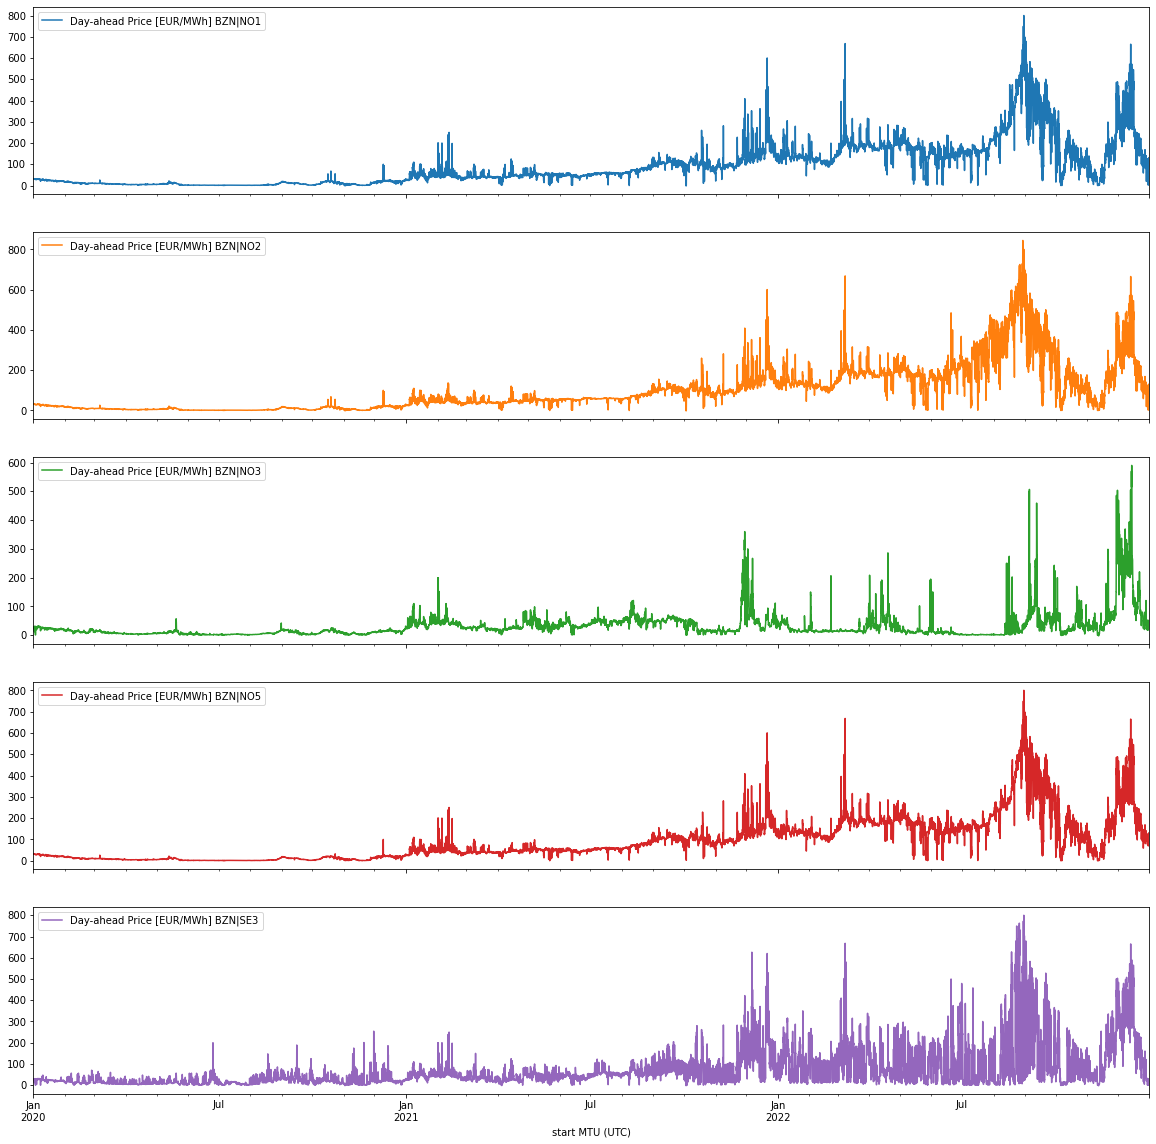

In [7]:
# creating a dataset containing only datetime and day-ahead price for the different zones
price_column_names = [col_name for col_name in df.columns if 'Day-ahead Price' in col_name]

price_columns = df.loc[:, price_column_names]
price_columns.insert(0, 'start MTU (UTC)', df['start MTU (UTC)'])

price_columns.plot(subplots=True, x='start MTU (UTC)', figsize=(20, 20))

We can see that the price increases over time, and that there is a significant shift over the period from 2021 to 2022, and a smaller shift over the period from 2020 to 2021. We can also see that the prive volatility increases over time. The shifts in volatility seem to somewhat align with the shifts to higher prices.

This large shift to higher prices and higher volatility of prices might impeed the algorithms ability to train a model on the data with a high performance in it's price prediction. It might therefore be of value to train one model on the entire dataset and one model on the last year (after the price shift), and compare their performance to see if the performance is increased.

Lastly there are some large spikes that doesn't follow the trendline, these are outliers and function as noise, they should therefore be handled to increase the performance of the model.

#### Plotting the load for each zone

array([<AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>], dtype=object)

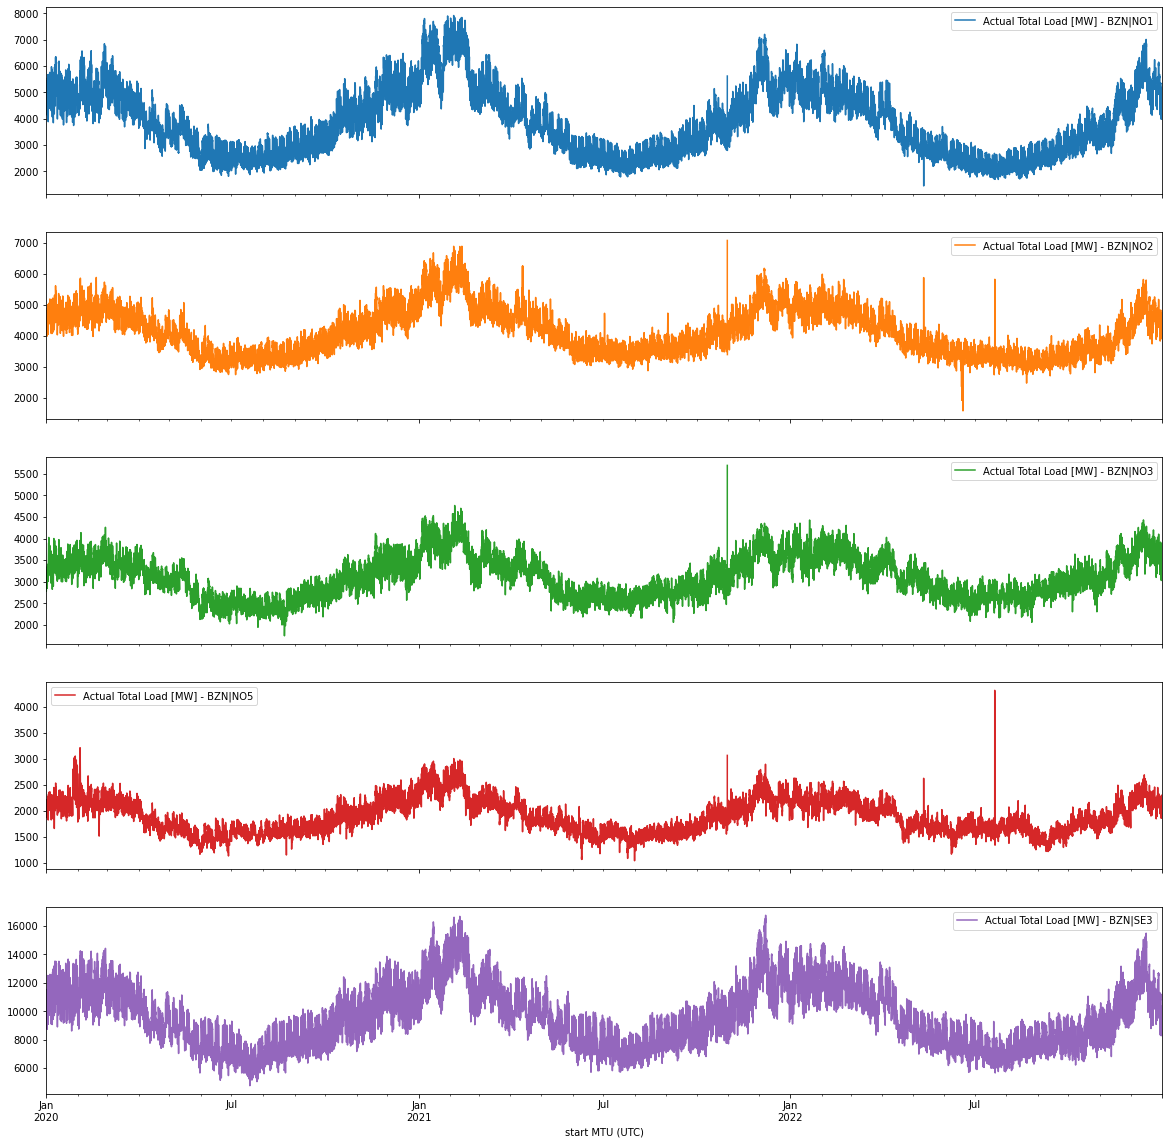

In [8]:
Load_column_names = [col_name for col_name in df.columns if 'Load' in col_name]

# creating a dataset containing only datetime and load for the different zones
Load_columns = df.loc[:, Load_column_names]
Load_columns.insert(0, 'start MTU (UTC)', df['start MTU (UTC)'])

Load_columns.plot(subplots=True, x='start MTU (UTC)', figsize=(20, 20))

We can see that the 'actual total load' seem to have seasonality where the highest prices are around december and january while the lowest prices are mid summer. This seasonality might be lost if we only train the modeles with one year instead of three, and might therefore potentially outweigh the potential performance loss resluting from the shift to higher price volatility we discovered in the "day-ahead price" graph.

Additionally there are some large spikes that doesn't follow the trendline, these are outliers and function as noise when training the model. The outliers should therefore be handled to increase the performance of the model.

#### Plotting the electricity production stemming from fossil gas for each zone

array([<AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>], dtype=object)

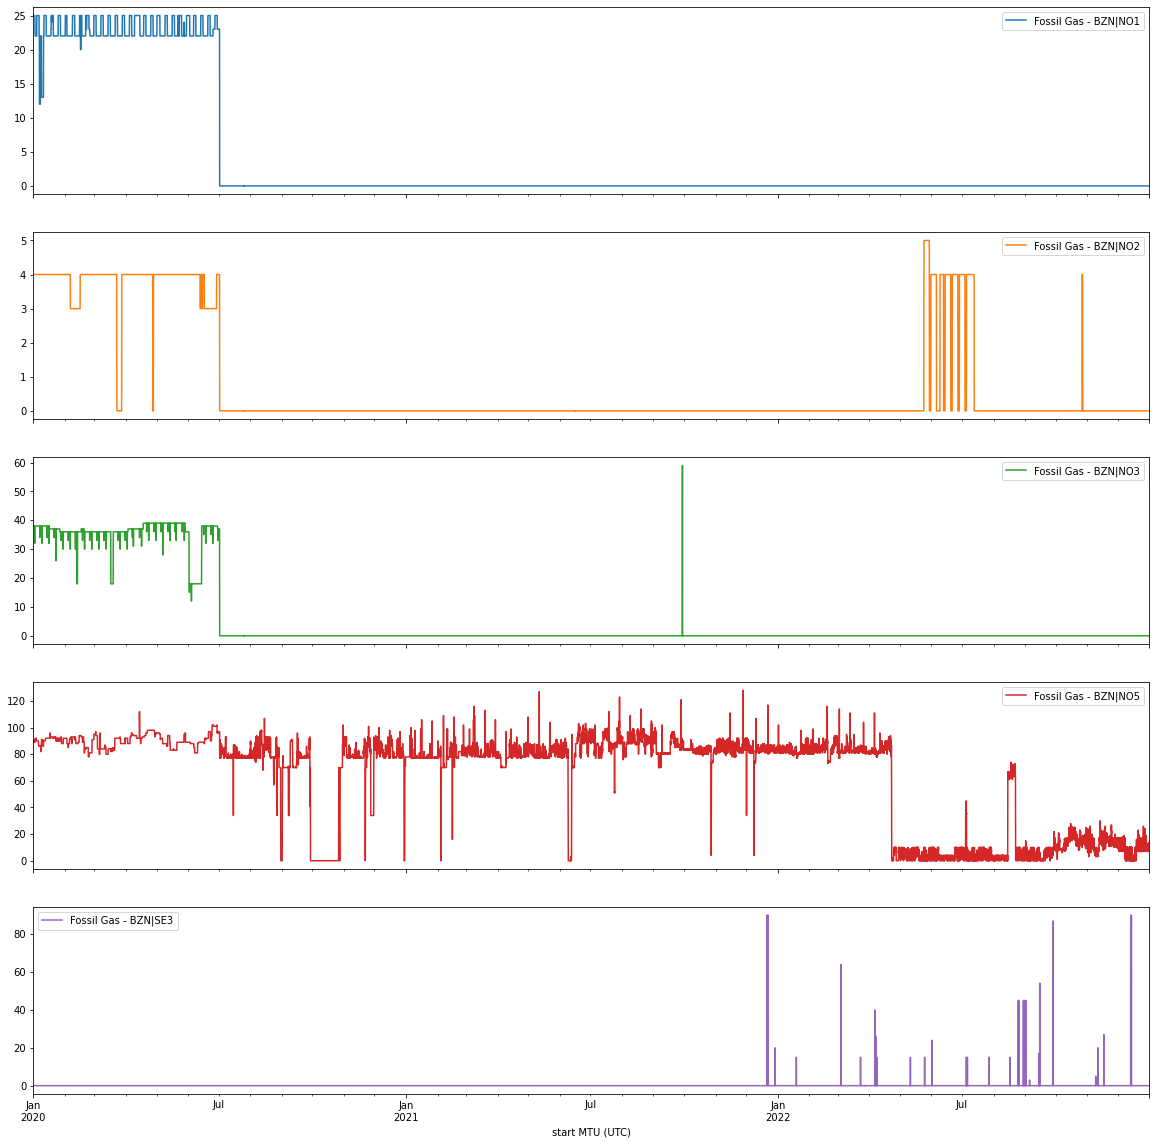

In [9]:
fossil_gas_column_names = [col_name for col_name in df.columns if 'Fossil Gas' in col_name]

# creating a dataset containing only datetime and load for the different zones
fossil_gas_columns = df.loc[:, fossil_gas_column_names]
fossil_gas_columns.insert(0, 'start MTU (UTC)', df['start MTU (UTC)'])

fossil_gas_columns.plot(subplots=True, x='start MTU (UTC)', figsize=(20, 20))

The electricity production from fossil gas is sparse in most of the zones, the exeption being zone NO5. These feature might therefore not be as important as some of the other features, so we should consider dimentionality reduction or not selecting these features during feature selection to reduce the potential noise that the model trains on.

Some of the data contains outliers in the form of spikes that fuctions as noise when training the data. If these features are keept, we should handle these outliers to increase the performance of the model.

#### Plotting the electricity production stemming from Hydro Run-of-river and pondage

array([<AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>], dtype=object)

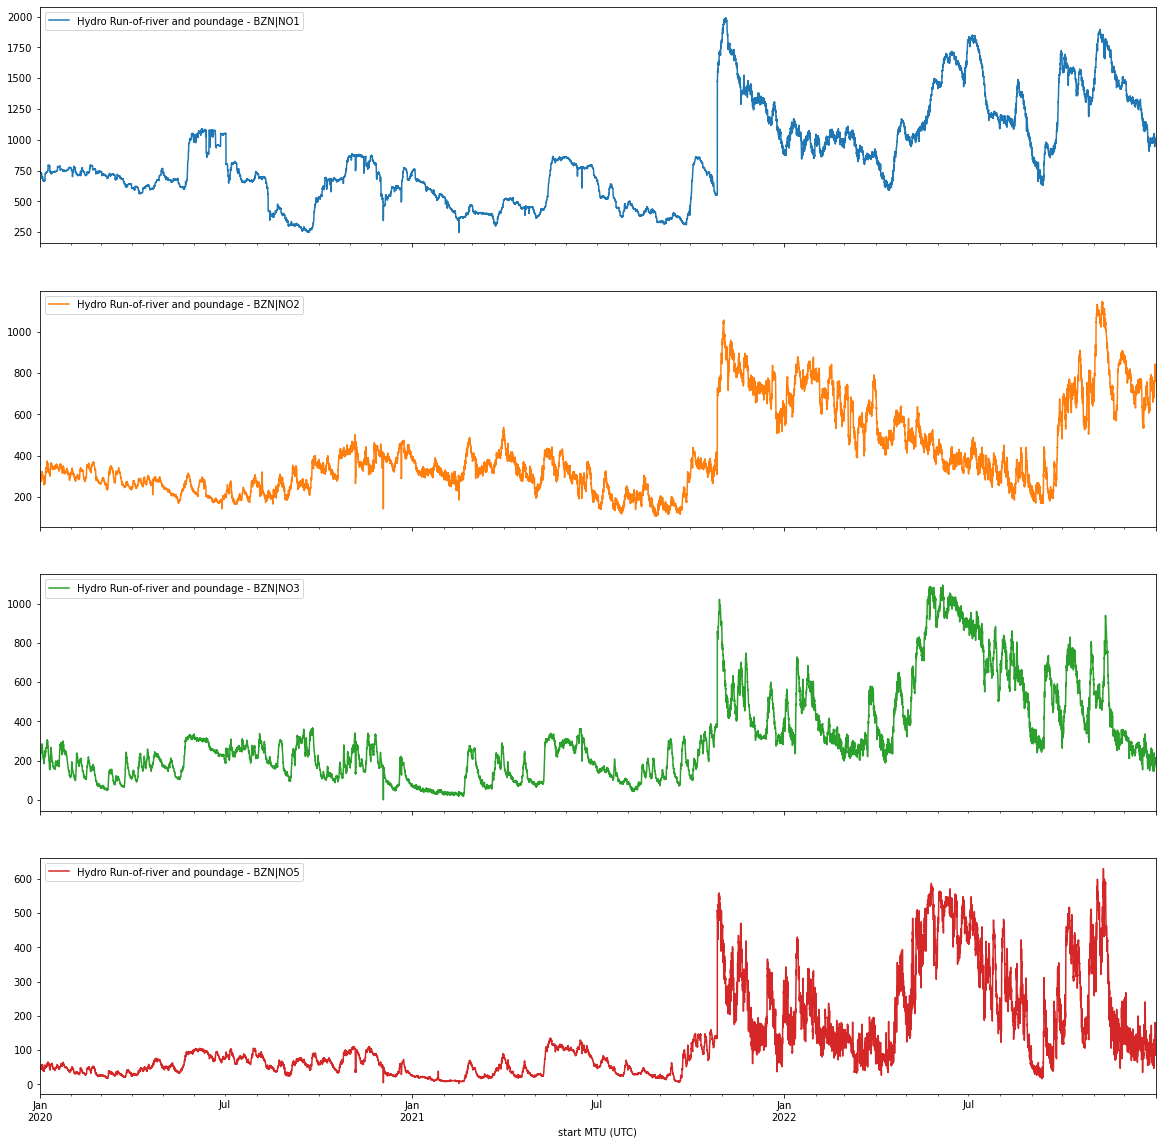

In [10]:
hydro_run_of_river_and_pondage_column_names = [col_name for col_name in df.columns if 'Hydro Run-of-river and poundage' in col_name]

# creating a dataset containing only datetime and 'Hydro Run-of-river and pondage' for the different zones
hydro_run_of_river_and_pondage_columns = df.loc[:, hydro_run_of_river_and_pondage_column_names]
hydro_run_of_river_and_pondage_columns.insert(0, 'start MTU (UTC)', df['start MTU (UTC)'])

hydro_run_of_river_and_pondage_columns.plot(subplots=True, x='start MTU (UTC)', figsize=(20, 20))

We can see that the maximum values and the volatility of the endergy production for 'Hydro Run-of-river and pondage' increases drastically around the start of November 2021. This significant shift in the data might negatively impact the performance of the models trained on the three year dataset, and is another reason to investigate different dataset sizes.

We can also se a couple of spikes that does not follow the trendline, these are outliers and will function as noise when training the model. We should therefore handle these to increase the performance of the model.

#### Plotting the electricity production stemming from Hydro Water Reservoir

array([<AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>], dtype=object)

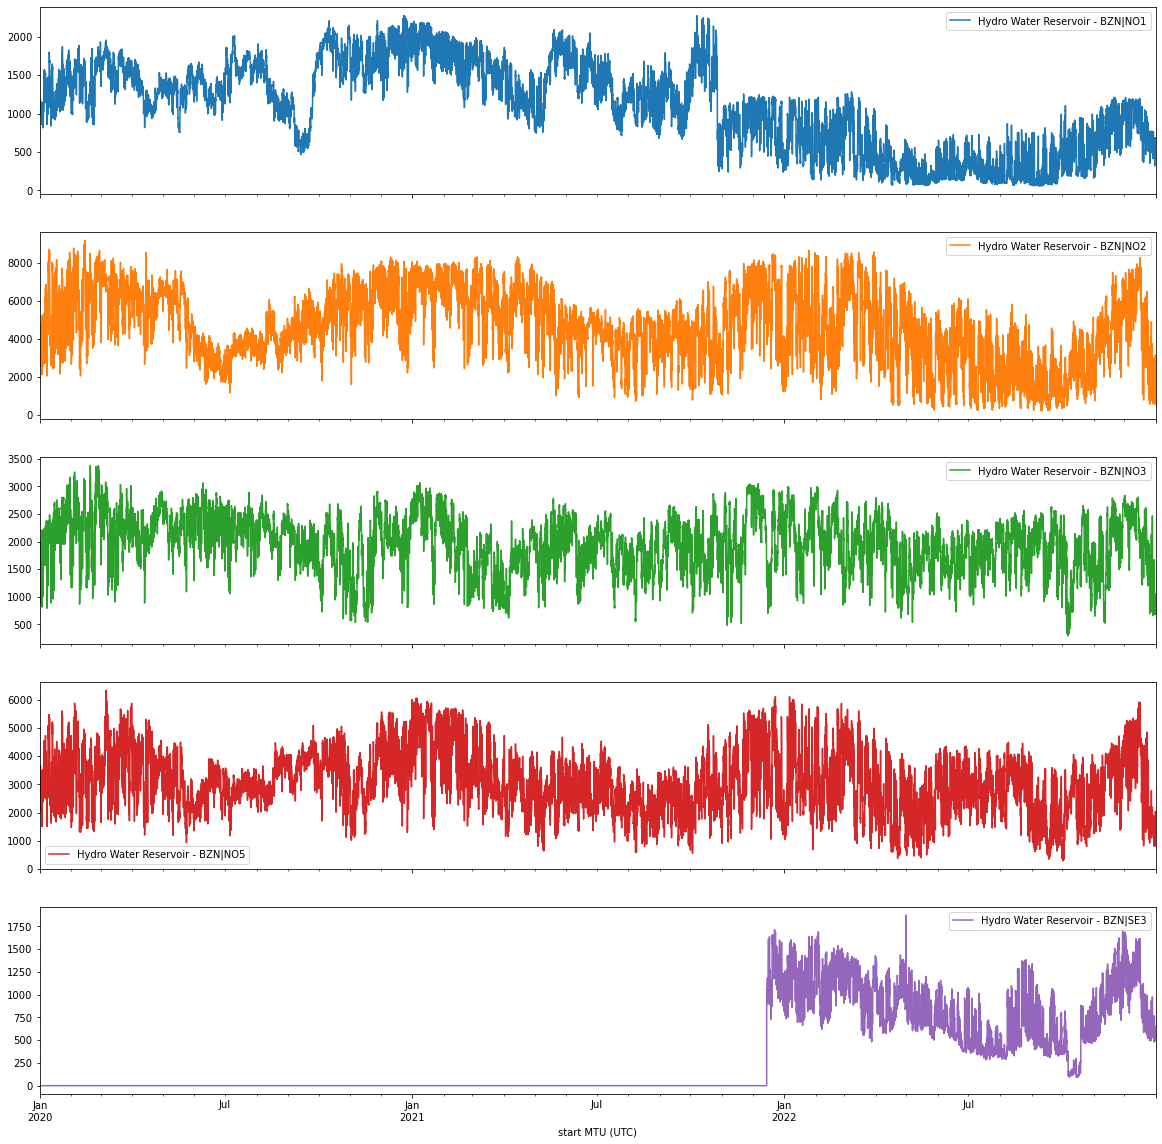

In [11]:
hydro_water_reservoir_column_names = [col_name for col_name in df.columns if 'Hydro Water Reservoir' in col_name]

# creating a dataset containing only datetime and 'Hydro Water Reservoir' for the different zones
hydro_water_reservoir_column_names_columns = df.loc[:, hydro_water_reservoir_column_names]
hydro_water_reservoir_column_names_columns.insert(0, 'start MTU (UTC)', df['start MTU (UTC)'])

hydro_water_reservoir_column_names_columns.plot(subplots=True, x='start MTU (UTC)', figsize=(20, 20))

We can see sesonality with production at it's highest at end of december and lowest, mid summer. This seasonality might be lost if we only train the modeles with one year instead of three.

We also see that the energy production is missing before mid desember 2021, which is a reason training on only 2022 might result in better performance. This should be considered when featureselecting and when comparing performance of three yrears  and one year.

Because the data is so volitile, it is hard to identify outliers, but there are some clear outliers, which will function as noice when training the model. We should therefore handle these outliers to increase the performance of the model.

#### Plotting the electricity production stemming from 'Other' and 'Other  Renewable'

array([<AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>], dtype=object)

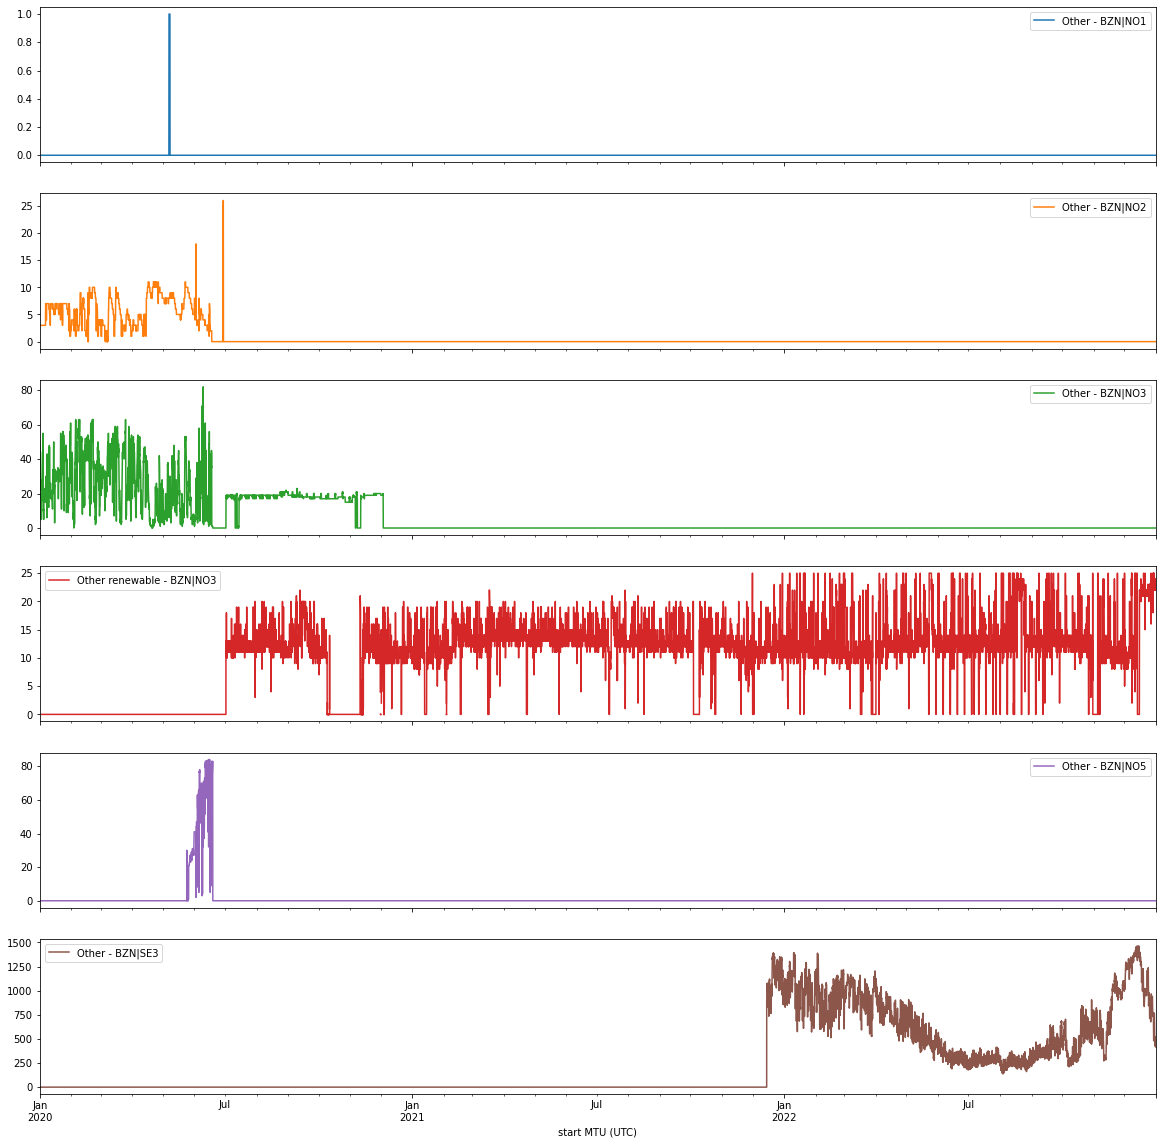

In [12]:
other_column_names = [col_name for col_name in df.columns if 'Other' in col_name]

# creating a dataset containing only datetime, 'Other'  and 'Other Renewable' for the different zones
other_columns = df.loc[:, other_column_names]
other_columns.insert(0, 'start MTU (UTC)', df['start MTU (UTC)'])

other_columns.plot(subplots=True, x='start MTU (UTC)', figsize=(20, 20))

Electricity production from source 'other' is sparce/missing from all zones. These feature might therefore function as noise instead of signal when thraining the data. We should consider dimentionality reduction or not selecting these features during feature selection to reduce the potential noise and increase the performance of the model.

Some of the data contains outliers in the form of spikes that fuctions as noise when training the data. If these features are keept, we should handle these outliers to increase the performance of the model.

#### Plotting the electricity production stemming from 'Waste'

array([<AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>], dtype=object)

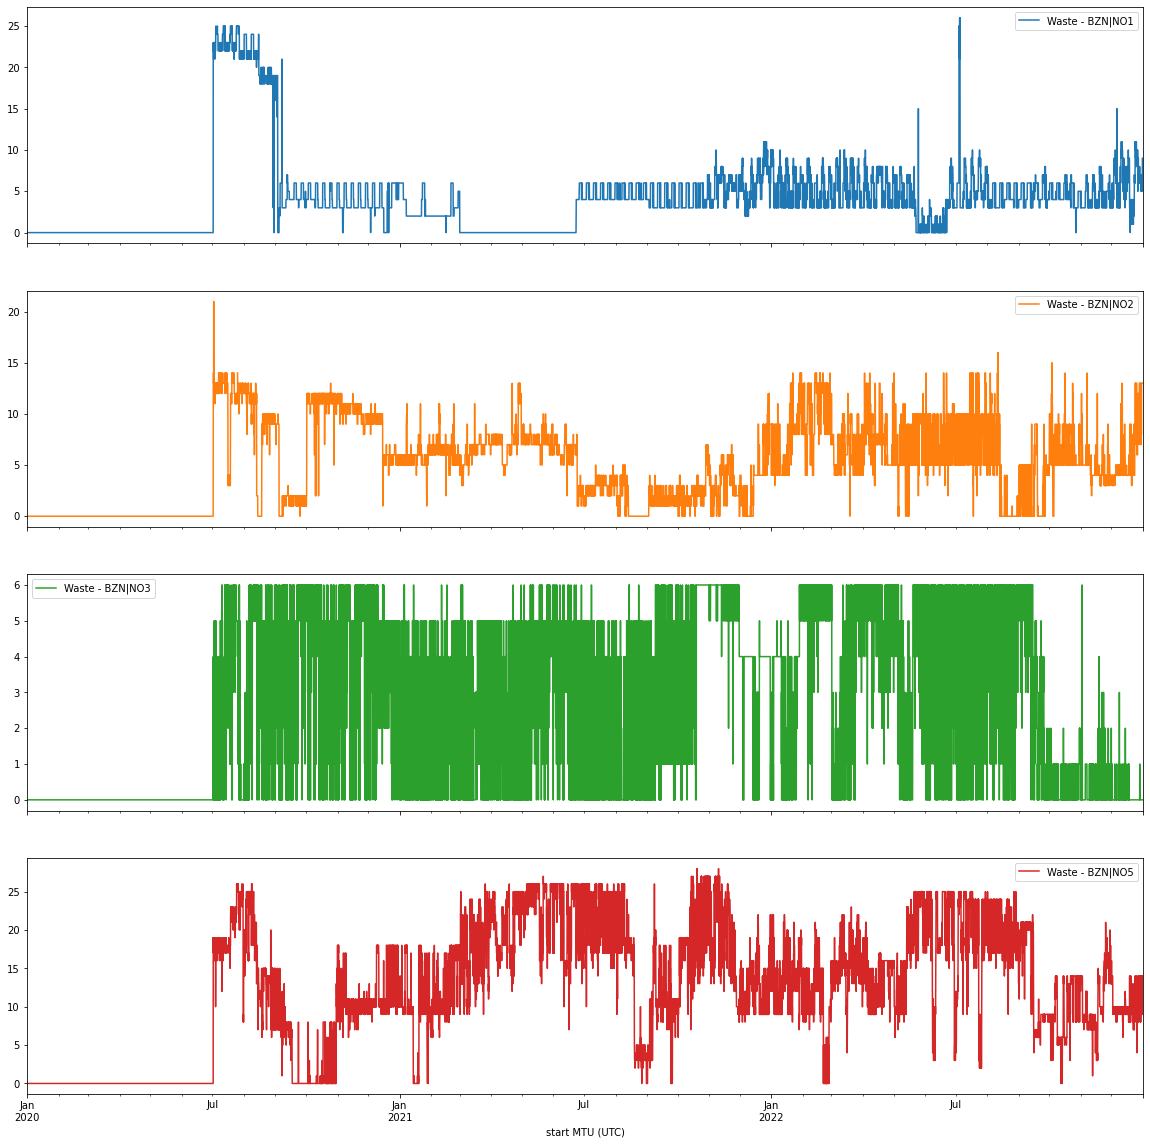

In [13]:
waste_column_names = [col_name for col_name in df.columns if 'Waste' in col_name]

# creating a dataset containing only datetime and 'Waste' for the different zones
waste_columns = df.loc[:, waste_column_names]
waste_columns.insert(0, 'start MTU (UTC)', df['start MTU (UTC)'])

waste_columns.plot(subplots=True, x='start MTU (UTC)', figsize=(20, 20))

We see that the energy production is missing before mid 2020 which should be considered when featureselecting and when comparing performance of three yrears and one year. There are also faint traces of the seasonality found in some of the other features.

A lot of the intermittent values are have the value 0 in NO3 creating high volatility and a trend graph that is hard to read.

Some of the data contains outliers in the form of spikes that fuctions as noise when training the data. If these features are keept, we should handle these outliers to increase the performance of the model.

Due to the large amount of missing values these features likely introduce more noice than signal to the model. These features should therefore be dropped.

#### Plotting the electricity production stemming from 'Wind Onshore'

array([<AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>], dtype=object)

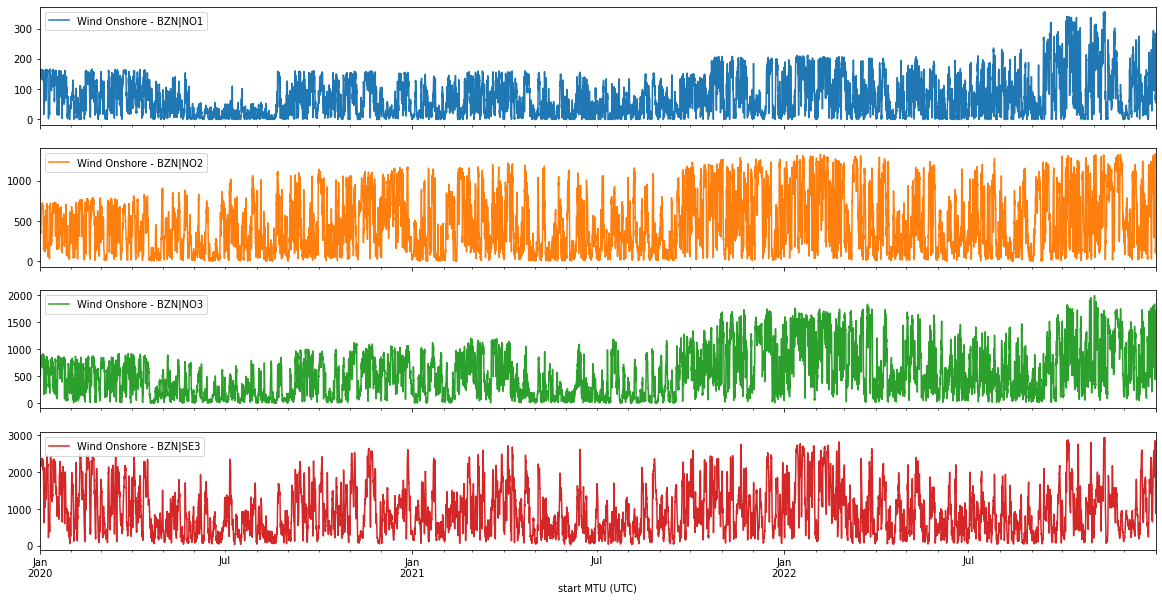

In [14]:
wind_onshore_column_names = [col_name for col_name in df.columns if 'Wind Onshore' in col_name]

# creating a dataset containing only datetime and 'Wind Onshore' for the different zones
wind_onshore_columns = df.loc[:, wind_onshore_column_names]
wind_onshore_columns.insert(0, 'start MTU (UTC)', df['start MTU (UTC)'])

wind_onshore_columns.plot(subplots=True, x='start MTU (UTC)', figsize=(20, 10))

We see that energy production from 'Wind Onshore' is very voletile but has faint traces of the seasonality found in some of the other features.

#### Plotting the electricity production stemming from 'Nuclear'

<AxesSubplot:xlabel='start MTU (UTC)'>

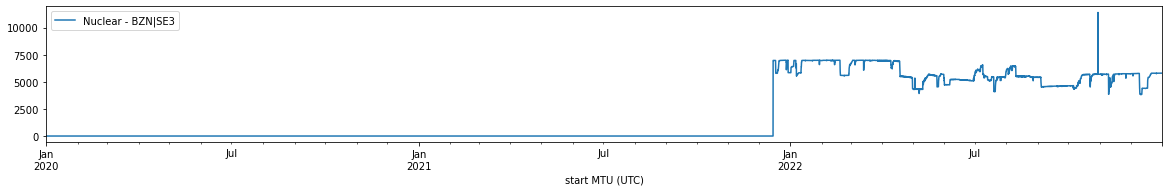

In [15]:
df.plot(x= 'start MTU (UTC)', y='Nuclear - BZN|SE3', figsize=(20, 2.5))

We see that energy production from 'nuclear' in sone SE3 is missing before mid December 2021. Training on only 2022 might result in better performance. This should be considered when featureselecting and when comparing performance of three yrears  and one year.



#### Plotting the electricity production stemming from 'solar'

<AxesSubplot:xlabel='start MTU (UTC)'>

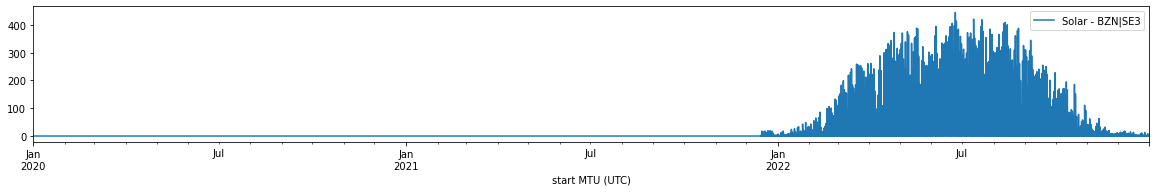

In [16]:
df.plot(x= 'start MTU (UTC)', y='Solar - BZN|SE3', figsize=(20, 2.5))

We see that energy production from 'Solar' in sone SE3 is missing before mid December 2021. Training on only 2022 might result in better performance. This should be considered when featureselecting and when comparing performance of three yrears  and one year.

In the data we have we can see signs of seasonality where production is highest mid summer, and lowest during winter months. This is presumably because there is more sun in the summer and less in the winter month.

#### Plotting the import to zone NO1

array([<AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>], dtype=object)

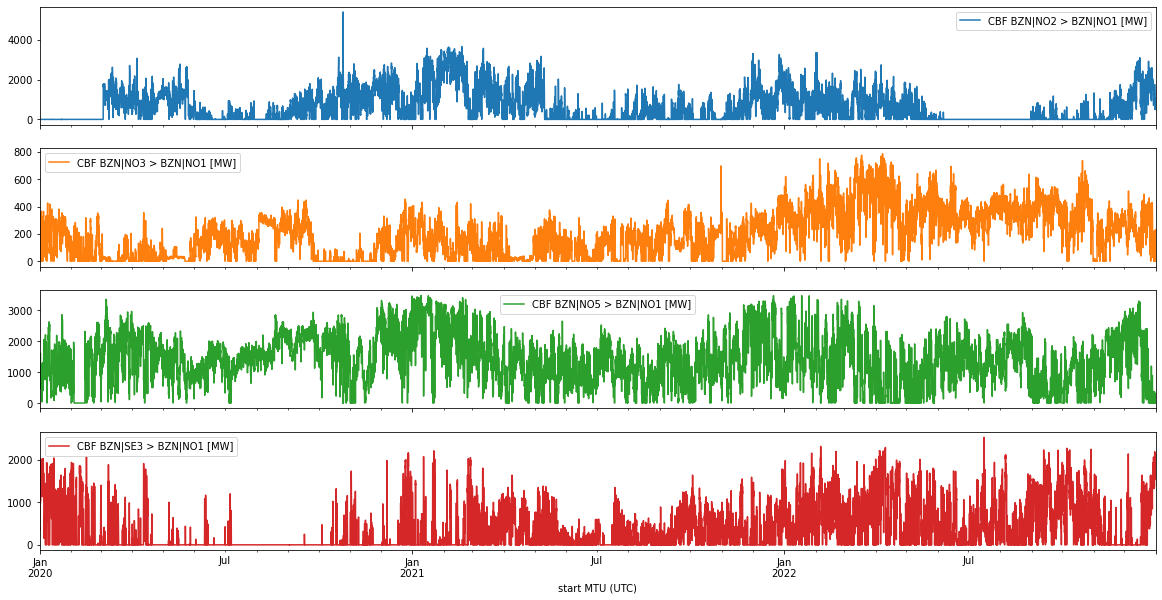

In [17]:
import_column_names = [col_name for col_name in df.columns if '> BZN|NO1' in col_name]

# creating a dataset containing only datetime and import to zone NO1 for the different zones
import_columns = df.loc[:, import_column_names]
import_columns.insert(0, 'start MTU (UTC)', df['start MTU (UTC)'])

import_columns.plot(subplots=True, x='start MTU (UTC)', figsize=(20, 10))

We see signs of seasonality where import is highest mid winter, and lowest mid summer. This seasonality might be lost if we only train the modeles with one year instead of three. Furthermore, the seasonality seems to vanish from the start of 2022 (width the exception of the import from NO2) which might lead to poor performance when training on all three years of data.

Additionally there are some large spikes that doesn't follow the trendline, these are outliers and function as noise when training the model. The outliers should therefore be handled to increase the performance of the model.

#### Plotting the export from zone NO1

array([<AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>], dtype=object)

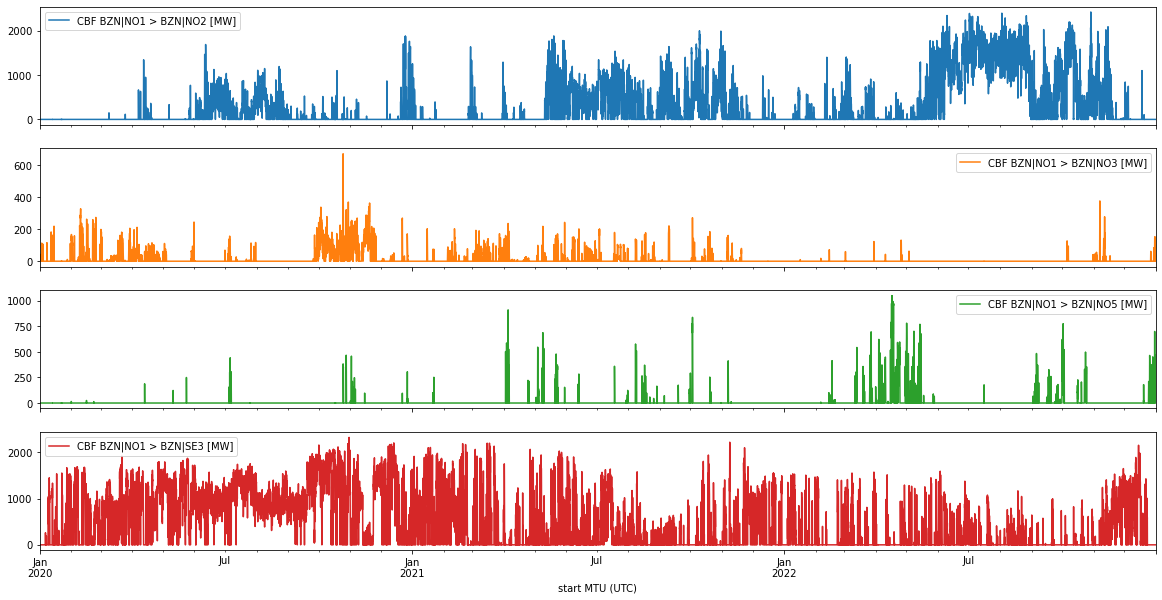

In [18]:
export_column_names = [col_name for col_name in df.columns if 'BZN|NO1 >' in col_name]

# creating a dataset containing only datetime and export from zone NO1 for the different zones
export_columns = df.loc[:, export_column_names]
export_columns.insert(0, 'start MTU (UTC)', df['start MTU (UTC)'])

export_columns.plot(subplots=True, x='start MTU (UTC)', figsize=(20, 10))

The export does not have any significant seasonality in it's data, and there are no noticably huge changes in the data with the exception of export to NO2 in the start of december. The effects of using one year versus three years will therefore probably be minimal from these features.

#### Plotting the 'Stored Energy Value Water Reservoirs and Hydro Storage Plants'

array([<AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>], dtype=object)

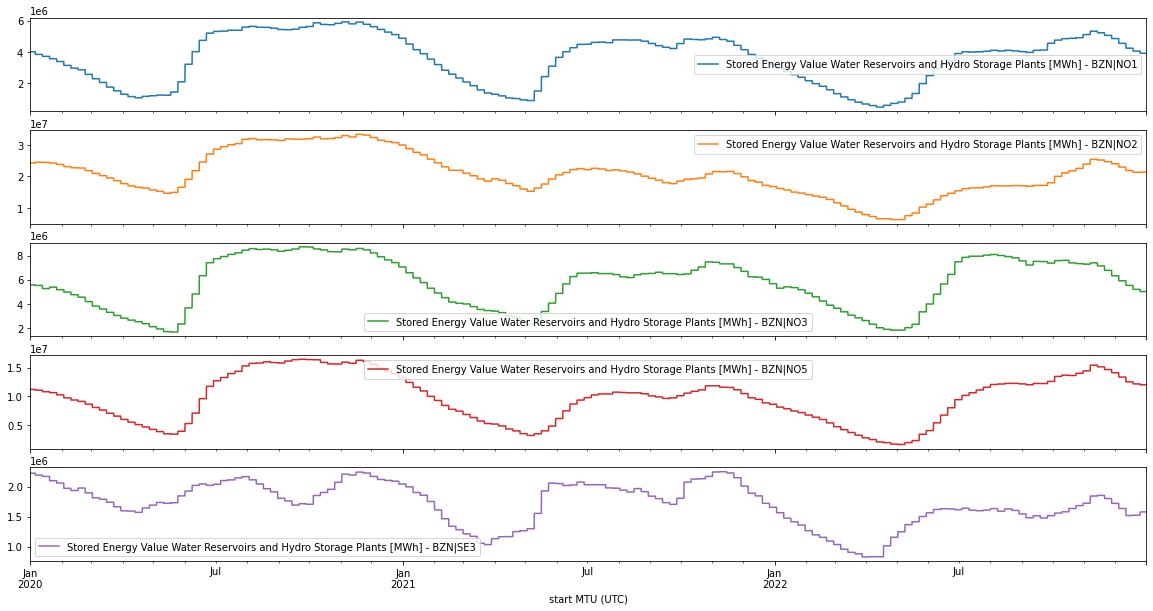

In [19]:
Stored_energy_value_water_reservoirs_and_hydro_storage_plants_column_names = [col_name for col_name in df.columns if 'Stored Energy Value Water Reservoirs and Hydro Storage Plants' in col_name]

# creating a dataset containing only datetime and 'Stored Energy Value Water Reservoirs and Hydro Storage Plants' for the different zones
Stored_energy_value_water_reservoirs_and_hydro_storage_plants_columns = df.loc[:, Stored_energy_value_water_reservoirs_and_hydro_storage_plants_column_names]
Stored_energy_value_water_reservoirs_and_hydro_storage_plants_columns.insert(0, 'start MTU (UTC)', df['start MTU (UTC)'])

Stored_energy_value_water_reservoirs_and_hydro_storage_plants_columns.plot(subplots=True, x='start MTU (UTC)', figsize=(20, 10))

We can see that the 'Stored Energy Value Water Reservoirs and Hydro Storage Plants' data has a step graph since it is measured weekly and not hourly.

The data exibits sesonality where the stored energy is at it's lowest in the spring and it's highest from mid summer to the end of the year. This seasonality might be lost if we only train the modeles with one year instead of three.

#### Summary of feature trend investigation
The target feature price in zone NO1 shows a signinficant increase in price and volatility of price from 2021 to 2022, this might have a negative impact on the performance of the models.

Several of the features have so many missing values/zero values that they would introduce more noice than signal when training the models, and should therefore be dropped.

A lot of the data seems to be missing prior to 2022, particularly from zone SE3. This might also lead to a decreased performance from the models trained on the three years of data.

Several of the features exibit some seasonality which might be lost when only using a single year to train the models.
The combination of a significant increase in price and volatility of price, as well as many features that are missing a lot of values pre 2022 means that training on the three years of data is likely to lead to poorer performance than just training on the year of 2022. We are therefore only going to keep the data from 2022.

The data cointains outliers that function as noise when training the model. The outliers should therefore be handled to increase the performance of the model.

## Feature selection

## Handling outliers

## Exploring feature correlation:

### Correlation investigation by zone:

**Feature correlation for zone no1**

In [20]:
# correlation matrix for zone NO1

# creating a dataset containing only columns relating to zone NO1
no1_column_names = [col_name for col_name in df.columns if 'NO1' in col_name]
no1_columns = df.loc[:, no1_column_names]

# calculating correlation
no1_correlation = no1_columns.corr()
# plotting correlation
no1_correlation.style.background_gradient(cmap='coolwarm', axis=None)

,Day-ahead Price [EUR/MWh] BZN|NO1,Actual Total Load [MW] - BZN|NO1,Fossil Gas - BZN|NO1,Hydro Run-of-river and poundage - BZN|NO1,Hydro Water Reservoir - BZN|NO1,Other - BZN|NO1,Waste - BZN|NO1,Wind Onshore - BZN|NO1,CBF BZN|NO2 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO2 [MW],CBF BZN|NO3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO3 [MW],CBF BZN|NO5 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO5 [MW],CBF BZN|SE3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|SE3 [MW],Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO1
Day-ahead Price [EUR/MWh] BZN|NO1,1.000000,-0.055997,-0.358247,0.427146,-0.576123,-0.024794,0.033479,0.086285,-0.086703,0.286851,0.523659,-0.210843,0.024086,0.024078,0.191673,-0.261462,-0.098036
Actual Total Load [MW] - BZN|NO1,-0.055997,1.000000,0.069383,-0.087875,0.385752,-0.011425,-0.229869,0.092170,0.651447,-0.512491,-0.097790,0.011284,0.449701,-0.084382,-0.062442,0.201185,-0.166151
Fossil Gas - BZN|NO1,-0.358247,0.069383,1.000000,-0.116927,0.201384,0.063967,-0.378944,-0.037374,-0.041327,-0.200117,-0.291500,0.052609,-0.053505,-0.070872,-0.085696,0.154561,-0.278937
Hydro Run-of-river and poundage - BZN|NO1,0.427146,-0.087875,-0.116927,1.000000,-0.518690,-0.014595,0.010671,0.203458,-0.244850,0.440704,0.338137,-0.105669,-0.037368,0.002479,0.140673,-0.201585,0.095035
Hydro Water Reservoir - BZN|NO1,-0.576123,0.385752,0.201384,-0.518690,1.000000,0.011663,-0.059484,-0.252002,0.267414,-0.362147,-0.638491,0.224513,0.398435,-0.187660,-0.473180,0.516766,0.222904
Other - BZN|NO1,-0.024794,-0.011425,0.063967,-0.014595,0.011663,1.000000,-0.025695,-0.017155,0.011493,-0.015931,-0.032102,-0.009280,-0.009871,-0.005002,-0.012260,0.016039,-0.044475
Waste - BZN|NO1,0.033479,-0.229869,-0.378944,0.010671,-0.059484,-0.025695,1.000000,-0.096060,-0.151253,0.053385,0.190241,-0.080049,0.023947,0.036961,-0.034905,0.119939,0.403646
Wind Onshore - BZN|NO1,0.086285,0.092170,-0.037374,0.203458,-0.252002,-0.017155,-0.096060,1.000000,-0.060235,0.084989,0.039430,0.077693,-0.205276,0.002180,0.373459,-0.315788,-0.027535
CBF BZN|NO2 > BZN|NO1 [MW],-0.086703,0.651447,-0.041327,-0.244850,0.267414,0.011493,-0.151253,-0.060235,1.000000,-0.442269,-0.226745,0.139308,0.260021,0.056715,-0.204629,0.401094,-0.199302
CBF BZN|NO1 > BZN|NO2 [MW],0.286851,-0.512491,-0.200117,0.440704,-0.362147,-0.015931,0.053385,0.084989,-0.442269,1.000000,0.277052,-0.132960,-0.068780,-0.071571,0.200310,-0.311376,0.168487


There is a moderately strong positive correlation between actual total load and import from zone NO2 to NO1.

There is also a moderately strong negative correlation between electricity production from hydro water reservoir in zone NO1 and import from zone NO3 to zone no1.

The remaining features have no significant correlation.

**Feature correlation for zone NO2**

In [21]:
# correlation matrix for zone NO2

# creating a dataset containing only columns relating to zone NO1
no2_column_names = [col_name for col_name in df.columns if 'NO2' in col_name]
no2_columns = df.loc[:, no2_column_names]

# adding day ahead price for zone NO1 (target feature)
no2_columns.insert(0, 'Day-ahead Price [EUR/MWh] BZN|NO1', df['Day-ahead Price [EUR/MWh] BZN|NO1'])

# calculating correlation
no2_correlation = no2_columns.corr()

# plotting correlation
no2_correlation.style.background_gradient(cmap='coolwarm', axis=None)

,Day-ahead Price [EUR/MWh] BZN|NO1,Day-ahead Price [EUR/MWh] BZN|NO2,Actual Total Load [MW] - BZN|NO2,Fossil Gas - BZN|NO2,Hydro Pumped Storage Aggregated- BZN|NO2,Hydro Run-of-river and poundage - BZN|NO2,Hydro Water Reservoir - BZN|NO2,Other - BZN|NO2,Waste - BZN|NO2,Wind Onshore - BZN|NO2,CBF BZN|NO2 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO2 [MW],Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO2
Day-ahead Price [EUR/MWh] BZN|NO1,1.000000,0.972172,-0.087013,-0.276932,-0.086967,0.310558,-0.196604,-0.299865,-0.042595,0.048393,-0.086703,0.286851,-0.474266
Day-ahead Price [EUR/MWh] BZN|NO2,0.972172,1.000000,-0.143011,-0.247736,-0.112807,0.258928,-0.222500,-0.289845,-0.034475,0.023721,-0.127042,0.387339,-0.460993
Actual Total Load [MW] - BZN|NO2,-0.087013,-0.143011,1.000000,-0.030648,0.299399,0.289296,0.718260,0.064851,0.026131,0.129610,0.641611,-0.498831,0.042985
Fossil Gas - BZN|NO2,-0.276932,-0.247736,-0.030648,1.000000,-0.406400,-0.266983,0.071495,0.734742,-0.451281,-0.128436,-0.110795,0.004358,-0.123179
Hydro Pumped Storage Aggregated- BZN|NO2,-0.086967,-0.112807,0.299399,-0.406400,1.000000,-0.200946,0.420267,-0.315420,0.040539,-0.165566,0.301933,-0.173087,0.178252
Hydro Run-of-river and poundage - BZN|NO2,0.310558,0.258928,0.289296,-0.266983,-0.200946,1.000000,0.088739,-0.226481,0.193438,0.296578,0.082865,-0.030707,-0.211266
Hydro Water Reservoir - BZN|NO2,-0.196604,-0.222500,0.718260,0.071495,0.420267,0.088739,1.000000,0.185399,-0.128666,-0.165433,0.461470,-0.457315,0.148901
Other - BZN|NO2,-0.299865,-0.289845,0.064851,0.734742,-0.315420,-0.226481,0.185399,1.000000,-0.469236,-0.113001,-0.000082,-0.193389,-0.068782
Waste - BZN|NO2,-0.042595,-0.034475,0.026131,-0.451281,0.040539,0.193438,-0.128666,-0.469236,1.000000,0.146210,0.157358,0.034068,0.122954
Wind Onshore - BZN|NO2,0.048393,0.023721,0.129610,-0.128436,-0.165566,0.296578,-0.165433,-0.113001,0.146210,1.000000,0.165126,-0.096206,-0.014952


The target feature day-ahead price for zone NO1 has a very strong positive correlation with the day-ahead price for zone NO2 at 0.972. 

We also see a moderately strong positive correlation between:
    
    - Actual total load in zone NO2 and electricity production from hydro water reservoir in zone no2.

    - Actual total load in zone NO2 and export from zone NO2 to No1. 

    - Electricity production from fossil gas in in zone NO2 and electricity production from source 'other' in zone NO2.
    
The remaining feature have no significant correlation.

**Feature correlation for zone NO3**

In [22]:
# correlation matrix for zone NO3

# creating a dataset containing only columns relating to zone NO1
no3_column_names = [col_name for col_name in df.columns if 'NO3' in col_name]
no3_columns = df.loc[:, no3_column_names]

# adding day ahead price for zone NO1 (target feature)
no3_columns.insert(0, 'Day-ahead Price [EUR/MWh] BZN|NO1', df['Day-ahead Price [EUR/MWh] BZN|NO1'])

# calculating correlation
no3_correlation = no3_columns.corr()

# plotting correlation
no3_correlation.style.background_gradient(cmap='coolwarm', axis=None)

,Day-ahead Price [EUR/MWh] BZN|NO1,Day-ahead Price [EUR/MWh] BZN|NO3,Actual Total Load [MW] - BZN|NO3,Fossil Gas - BZN|NO3,Hydro Pumped Storage Aggregated- BZN|NO3,Hydro Run-of-river and poundage - BZN|NO3,Hydro Water Reservoir - BZN|NO3,Other - BZN|NO3,Other renewable - BZN|NO3,Waste - BZN|NO3,Wind Onshore - BZN|NO3,CBF BZN|NO3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO3 [MW],Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO3
Day-ahead Price [EUR/MWh] BZN|NO1,1.000000,0.463774,0.108040,-0.352398,-0.100831,0.430659,0.018843,-0.426621,0.351685,0.194311,0.170908,0.523659,-0.210843,0.042078
Day-ahead Price [EUR/MWh] BZN|NO3,0.463774,1.000000,0.281263,-0.198209,0.189812,-0.085897,0.256734,-0.246013,0.159567,-0.057530,-0.035673,0.124286,-0.118114,-0.001707
Actual Total Load [MW] - BZN|NO3,0.108040,0.281263,1.000000,0.030772,0.038015,-0.219660,0.280026,-0.046356,-0.056500,-0.018677,0.288372,-0.015956,-0.018889,-0.272542
Fossil Gas - BZN|NO3,-0.352398,-0.198209,0.030772,1.000000,-0.349494,-0.243108,0.241178,0.627094,-0.713978,-0.476641,-0.154513,-0.288437,0.048790,-0.381141
Hydro Pumped Storage Aggregated- BZN|NO3,-0.100831,0.189812,0.038015,-0.349494,1.000000,-0.402696,0.235077,-0.192890,0.234513,0.080733,-0.269587,-0.059323,-0.101631,0.165221
Hydro Run-of-river and poundage - BZN|NO3,0.430659,-0.085897,-0.219660,-0.243108,-0.402696,1.000000,-0.171556,-0.277716,0.243286,0.242452,0.206064,0.476953,-0.156147,0.115682
Hydro Water Reservoir - BZN|NO3,0.018843,0.256734,0.280026,0.241178,0.235077,-0.171556,1.000000,0.126971,-0.224209,0.006579,-0.375515,0.165381,-0.288554,-0.027284
Other - BZN|NO3,-0.426621,-0.246013,-0.046356,0.627094,-0.192890,-0.277716,0.126971,1.000000,-0.530318,-0.267639,-0.117401,-0.305763,0.198939,-0.024041
Other renewable - BZN|NO3,0.351685,0.159567,-0.056500,-0.713978,0.234513,0.243286,-0.224209,-0.530318,1.000000,0.312117,0.166457,0.301974,-0.153862,0.185182
Waste - BZN|NO3,0.194311,-0.057530,-0.018677,-0.476641,0.080733,0.242452,0.006579,-0.267639,0.312117,1.000000,0.007468,0.213124,0.003638,0.195665


The target feature day-ahead price for zone NO1 has a moderately strong positive correlation the import from zone NO1 from zone NO3.
There is a moderately strong positive corcorrelation between fossil gas and 'other' and a moderately strong negative correlation between fossil gas and 'other renewable'. 

The remaining features have no significant correlation.

**Feature correlation for zone NO5**

In [23]:
# correlation matrix for zone NO5

# creating a dataset containing only columns relating to zone NO1
no5_column_names = [col_name for col_name in df.columns if 'NO5' in col_name]
no5_columns = df.loc[:, no5_column_names]

# adding day ahead price for zone NO1 (target feature)
no5_columns.insert(0, 'Day-ahead Price [EUR/MWh] BZN|NO1', df['Day-ahead Price [EUR/MWh] BZN|NO1'])

# calculating correlation
no5_correlation = no5_columns.corr()

# plotting correlation
no5_correlation.style.background_gradient(cmap='coolwarm', axis=None)

,Day-ahead Price [EUR/MWh] BZN|NO1,Day-ahead Price [EUR/MWh] BZN|NO5,Actual Total Load [MW] - BZN|NO5,Fossil Gas - BZN|NO5,Hydro Pumped Storage Aggregated- BZN|NO5,Hydro Run-of-river and poundage - BZN|NO5,Hydro Water Reservoir - BZN|NO5,Other - BZN|NO5,Waste - BZN|NO5,CBF BZN|NO5 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO5 [MW],Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO5
Day-ahead Price [EUR/MWh] BZN|NO1,1.000000,0.998956,-0.005517,-0.505832,-0.111623,0.344569,-0.034720,-0.121281,0.254640,0.024086,0.024078,-0.068164
Day-ahead Price [EUR/MWh] BZN|NO5,0.998956,1.000000,-0.008035,-0.508122,-0.114065,0.344486,-0.039625,-0.121369,0.255292,0.019372,0.029394,-0.068775
Actual Total Load [MW] - BZN|NO5,-0.005517,-0.008035,1.000000,0.191599,0.381171,-0.153673,0.609012,-0.172696,-0.199166,0.470766,-0.076433,-0.007214
Fossil Gas - BZN|NO5,-0.505832,-0.508122,0.191599,1.000000,0.213471,-0.573550,0.147394,0.096253,-0.142140,0.075617,-0.067952,-0.195489
Hydro Pumped Storage Aggregated- BZN|NO5,-0.111623,-0.114065,0.381171,0.213471,1.000000,-0.398298,0.472210,-0.124268,0.109336,0.534439,-0.099628,0.198750
Hydro Run-of-river and poundage - BZN|NO5,0.344569,0.344486,-0.153673,-0.573550,-0.398298,1.000000,-0.135146,-0.038527,0.285504,-0.059058,-0.008035,-0.062217
Hydro Water Reservoir - BZN|NO5,-0.034720,-0.039625,0.609012,0.147394,0.472210,-0.135146,1.000000,-0.056354,-0.259514,0.927607,-0.321302,0.151555
Other - BZN|NO5,-0.121281,-0.121369,-0.172696,0.096253,-0.124268,-0.038527,-0.056354,1.000000,-0.202187,-0.045275,-0.022778,-0.100658
Waste - BZN|NO5,0.254640,0.255292,-0.199166,-0.142140,0.109336,0.285504,-0.259514,-0.202187,1.000000,-0.161128,0.075392,-0.088817
CBF BZN|NO5 > BZN|NO1 [MW],0.024086,0.019372,0.470766,0.075617,0.534439,-0.059058,0.927607,-0.045275,-0.161128,1.000000,-0.289592,0.210668


The target feature day-ahead price for zone NO1 has a very strong positive correlation with the day-ahead price for zone NO5 at 0.998.

Another very strong postitive correlation is between electricity production from water reservoir in zone NO5 and export from zone NO5 to NO1 at 0.927.

Additionally there is a moderately strong positive correlation between actual total load and electricity production from hydro water reservoir.

The remaining features have no significant correlation.

**Feature correlation for zone SE3**

In [24]:
# correlation matrix for zone SE3

# creating a dataset containing only columns relating to zone NO1
se3_column_names = [col_name for col_name in df.columns if 'SE3' in col_name]
se3_columns = df.loc[:, se3_column_names]

# adding day ahead price for zone NO1 (target feature)
se3_columns.insert(0, 'Day-ahead Price [EUR/MWh] BZN|NO1', df['Day-ahead Price [EUR/MWh] BZN|NO1'])

# calculating correlation
se3_correlation = se3_columns.corr()

# plotting correlation
se3_correlation.style.background_gradient(cmap='coolwarm', axis=None)

,Day-ahead Price [EUR/MWh] BZN|NO1,Day-ahead Price [EUR/MWh] BZN|SE3,Actual Total Load [MW] - BZN|SE3,Fossil Gas - BZN|SE3,Hydro Water Reservoir - BZN|SE3,Nuclear - BZN|SE3,Other - BZN|SE3,Solar - BZN|SE3,Wind Onshore - BZN|SE3,CBF BZN|SE3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|SE3 [MW],Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|SE3
Day-ahead Price [EUR/MWh] BZN|NO1,1.000000,0.771236,0.044397,0.182520,0.676582,0.678329,0.594685,0.334046,-0.112480,0.191673,-0.261462,-0.387991
Day-ahead Price [EUR/MWh] BZN|SE3,0.771236,1.000000,0.229154,0.233318,0.600482,0.429634,0.494157,0.274964,-0.263369,-0.126788,0.014881,-0.196188
Actual Total Load [MW] - BZN|SE3,0.044397,0.229154,1.000000,0.063945,0.194823,0.027785,0.253507,-0.118164,0.162804,-0.108324,0.201938,-0.167473
Fossil Gas - BZN|SE3,0.182520,0.233318,0.063945,1.000000,0.123459,0.073640,0.106856,0.023357,-0.032254,-0.022202,0.029684,-0.016265
Hydro Water Reservoir - BZN|SE3,0.676582,0.600482,0.194823,0.123459,1.000000,0.899661,0.939907,0.322014,0.018879,0.193307,-0.217831,-0.536869
Nuclear - BZN|SE3,0.678329,0.429634,0.027785,0.073640,0.899661,1.000000,0.874558,0.377730,0.070804,0.369231,-0.346294,-0.581785
Other - BZN|SE3,0.594685,0.494157,0.253507,0.106856,0.939907,0.874558,1.000000,0.224475,0.074505,0.245897,-0.214577,-0.537424
Solar - BZN|SE3,0.334046,0.274964,-0.118164,0.023357,0.322014,0.377730,0.224475,1.000000,-0.123301,0.156998,-0.166472,-0.242907
Wind Onshore - BZN|SE3,-0.112480,-0.263369,0.162804,-0.032254,0.018879,0.070804,0.074505,-0.123301,1.000000,0.396304,-0.334559,-0.053700
CBF BZN|SE3 > BZN|NO1 [MW],0.191673,-0.126788,-0.108324,-0.022202,0.193307,0.369231,0.245897,0.156998,0.396304,1.000000,-0.547191,-0.319183


The target feature day-ahead price for zone NO1 has a strong postive correlation width day ahead price in zone NO3, and a moderately strong correlation with electricity production from 'hydro water reservoir', 'nuclear' and 'other'.

Day ahead price for SE3 has a moderately strong positive correlation with electricity production from 'hydro water reservoir'.

Electricity production from hydro water reservoir, nuclear and 'other' have all a high correlation with each other. The high correlatioin means that the data adds complexity to the trainign process without increasing performance of the final model. We should therfore consider dropping the redundant features under feature selection.

The remaining featuress have no significant correlation.

### Summary, correlation investigation by zone
There seems to mainly be a correlation between the target feature day-ahead price for zone NO1 and the day-ahead price in other zones, with some additional correlations that doesn't appear to have any noticable pattern.
The high correlatioin means that the data adds complexity to the trainign process without increasing performance of the final model. We should therfore consider dropping the redundant features under feature selection.


### Correlation investigation by feature:

**Feature correlation (Day-ahead Price)**

In [25]:
# correlation matrix for Day-ahead Price

# creating a dataset containing only Day-ahead Price columns
day_ahead_price_column_names = [col_name for col_name in df.columns if 'Day-ahead Price' in col_name]
day_ahead_price_columns = df.loc[:, day_ahead_price_column_names]

# calculating correlation
day_ahead_price_correlation = day_ahead_price_columns.corr()

# plotting correlation
day_ahead_price_correlation.style.background_gradient(cmap='coolwarm', axis=None)

,Day-ahead Price [EUR/MWh] BZN|NO1,Day-ahead Price [EUR/MWh] BZN|NO2,Day-ahead Price [EUR/MWh] BZN|NO3,Day-ahead Price [EUR/MWh] BZN|NO5,Day-ahead Price [EUR/MWh] BZN|SE3
Day-ahead Price [EUR/MWh] BZN|NO1,1.000000,0.972172,0.463774,0.998956,0.771236
Day-ahead Price [EUR/MWh] BZN|NO2,0.972172,1.000000,0.390942,0.970923,0.743452
Day-ahead Price [EUR/MWh] BZN|NO3,0.463774,0.390942,1.000000,0.464462,0.560566
Day-ahead Price [EUR/MWh] BZN|NO5,0.998956,0.970923,0.464462,1.000000,0.768764
Day-ahead Price [EUR/MWh] BZN|SE3,0.771236,0.743452,0.560566,0.768764,1.000000


We can see the very strong postitive correlation between day-ahead price in zone NO1 and day ahead price in zones NO2 and NO5, as well as a moderately strong correlation with day ahead price in zones SE3.

we see a similarly strong correlation between zone NO2 and NO5.

Additionally zone SE3 has a moderately high corelation with all of the other zones.

Zone NO3 is the zone with the weakest correlation with every other zone.

Summed up day ahead price in other zones seems to bee an important feature for price prediction in zone NO1.

**Feature correlation (Actual Total Load)**

In [26]:
# correlation matrix for Load

# creating a dataset containing only Load columns
load_column_names = [col_name for col_name in df.columns if 'Actual Total Load' in col_name]
load_columns = df.loc[:, load_column_names]

# adding day ahead price for zone NO1 (target feature)
load_columns.insert(0, 'Day-ahead Price [EUR/MWh] BZN|NO1', df['Day-ahead Price [EUR/MWh] BZN|NO1'])


# calculating correlation
load_correlation = load_columns.corr()
# plotting correlation
load_correlation.style.background_gradient(cmap='coolwarm', axis=None)

,Day-ahead Price [EUR/MWh] BZN|NO1,Actual Total Load [MW] - BZN|NO1,Actual Total Load [MW] - BZN|NO2,Actual Total Load [MW] - BZN|NO3,Actual Total Load [MW] - BZN|NO5,Actual Total Load [MW] - BZN|SE3
Day-ahead Price [EUR/MWh] BZN|NO1,1.000000,-0.055997,-0.087013,0.108040,-0.005517,0.044397
Actual Total Load [MW] - BZN|NO1,-0.055997,1.000000,0.962048,0.919751,0.929423,0.954985
Actual Total Load [MW] - BZN|NO2,-0.087013,0.962048,1.000000,0.905696,0.927698,0.945594
Actual Total Load [MW] - BZN|NO3,0.108040,0.919751,0.905696,1.000000,0.894607,0.914181
Actual Total Load [MW] - BZN|NO5,-0.005517,0.929423,0.927698,0.894607,1.000000,0.908984
Actual Total Load [MW] - BZN|SE3,0.044397,0.954985,0.945594,0.914181,0.908984,1.000000


There is no significant correlation between day-ahead price in zone NO1 and any of the actual total load in the different zones. There are however very strong correlation between load in all of the zones. The high correlation could increase the complexity when training the model without increasing the performance. We should therefore consider dropping the redundant 'actual total load' features from the neighbouring zones under feature selection.

**Feature correlation (Fossil Gas)**

In [27]:
# correlation matrix for Fossil Gas

# creating a dataset containing only fossil gas columns
fossil_gas_column_names = [col_name for col_name in df.columns if 'Fossil Gas' in col_name]
fossil_gas_columns = df.loc[:, fossil_gas_column_names]

# adding day ahead price for zone NO1 (target feature)
fossil_gas_columns.insert(0, 'Day-ahead Price [EUR/MWh] BZN|NO1', df['Day-ahead Price [EUR/MWh] BZN|NO1'])

# calculating correlation
fossil_gas_correlation = fossil_gas_columns.corr()
# plotting correlation
fossil_gas_correlation.style.background_gradient(cmap='coolwarm', axis=None)

,Day-ahead Price [EUR/MWh] BZN|NO1,Fossil Gas - BZN|NO1,Fossil Gas - BZN|NO2,Fossil Gas - BZN|NO3,Fossil Gas - BZN|NO5,Fossil Gas - BZN|SE3
Day-ahead Price [EUR/MWh] BZN|NO1,1.000000,-0.358247,-0.276932,-0.352398,-0.505832,0.182520
Fossil Gas - BZN|NO1,-0.358247,1.000000,0.847316,0.980986,0.337788,-0.023044
Fossil Gas - BZN|NO2,-0.276932,0.847316,1.000000,0.836634,0.134833,-0.023754
Fossil Gas - BZN|NO3,-0.352398,0.980986,0.836634,1.000000,0.336897,-0.022824
Fossil Gas - BZN|NO5,-0.505832,0.337788,0.134833,0.336897,1.000000,-0.026845
Fossil Gas - BZN|SE3,0.182520,-0.023044,-0.023754,-0.022824,-0.026845,1.000000


There is no significant correlation between day-ahead price in zone NO1 and any of the electricity production from fossil gass for any of the zones. There are however very strong correlation between the electricity production for zones NO1, NO2 and NO3. The high correlation could increase the complexity when training the model without increasing the performance. We should therefore consider dropping the redundant electricity production from 'Fossil Gas' features from zones NO2 and NO3 under feature selection.

**Feature correlation (Hydro Run-of-river and poundage)**

In [28]:
# correlation matrix for Hydro Run-of-river and poundage

# creating a dataset containing only Hydro Run-of-river and poundage columns
hydro_run_of_river_and_pondage_column_names = [col_name for col_name in df.columns if 'Hydro Run-of-river and poundage' in col_name]
hydro_run_of_river_and_pondage_columns = df.loc[:, hydro_run_of_river_and_pondage_column_names]

# adding day ahead price for zone NO1 (target feature)
hydro_run_of_river_and_pondage_columns.insert(0, 'Day-ahead Price [EUR/MWh] BZN|NO1', df['Day-ahead Price [EUR/MWh] BZN|NO1'])


# calculating correlation
hydro_run_of_river_and_pondage_correlation = hydro_run_of_river_and_pondage_columns.corr()
# plotting correlation
hydro_run_of_river_and_pondage_correlation.style.background_gradient(cmap='coolwarm', axis=None)

,Day-ahead Price [EUR/MWh] BZN|NO1,Hydro Run-of-river and poundage - BZN|NO1,Hydro Run-of-river and poundage - BZN|NO2,Hydro Run-of-river and poundage - BZN|NO3,Hydro Run-of-river and poundage - BZN|NO5
Day-ahead Price [EUR/MWh] BZN|NO1,1.000000,0.427146,0.310558,0.430659,0.344569
Hydro Run-of-river and poundage - BZN|NO1,0.427146,1.000000,0.654911,0.771653,0.804251
Hydro Run-of-river and poundage - BZN|NO2,0.310558,0.654911,1.000000,0.401988,0.521453
Hydro Run-of-river and poundage - BZN|NO3,0.430659,0.771653,0.401988,1.000000,0.925864
Hydro Run-of-river and poundage - BZN|NO5,0.344569,0.804251,0.521453,0.925864,1.000000


There is no significant correlation between day-ahead price in zone NO1 and any of the electricity production from Hydro Run-of-river and poundage for any of the zones. there is however strong possitive correlation between between hydro run-of-river and pondage in no1 and all neighbouring zones, as well as between zone NO3 and NO5.

**Feature correlation (Hydro Water Reservoir)**

In [29]:
# correlation matrix for Hydro Water Reservoir

# creating a dataset containing only Hydro Water Reservoir columns
hydro_water_reservoir_column_names = [col_name for col_name in df.columns if 'Hydro Water Reservoir' in col_name]
hydro_water_reservoir_columns = df.loc[:, hydro_water_reservoir_column_names]

# adding day ahead price for zone NO1 (target feature)
hydro_water_reservoir_columns.insert(0, 'Day-ahead Price [EUR/MWh] BZN|NO1', df['Day-ahead Price [EUR/MWh] BZN|NO1'])


# calculating correlation
hydro_water_reservoir_correlation = hydro_water_reservoir_columns.corr()
# plotting correlation
hydro_water_reservoir_correlation.style.background_gradient(cmap='coolwarm', axis=None)

,Day-ahead Price [EUR/MWh] BZN|NO1,Hydro Water Reservoir - BZN|NO1,Hydro Water Reservoir - BZN|NO2,Hydro Water Reservoir - BZN|NO3,Hydro Water Reservoir - BZN|NO5,Hydro Water Reservoir - BZN|SE3
Day-ahead Price [EUR/MWh] BZN|NO1,1.000000,-0.576123,-0.196604,0.018843,-0.034720,0.676582
Hydro Water Reservoir - BZN|NO1,-0.576123,1.000000,0.575421,0.257493,0.476107,-0.580278
Hydro Water Reservoir - BZN|NO2,-0.196604,0.575421,1.000000,0.400482,0.763230,-0.068881
Hydro Water Reservoir - BZN|NO3,0.018843,0.257493,0.400482,1.000000,0.478090,0.025106
Hydro Water Reservoir - BZN|NO5,-0.034720,0.476107,0.763230,0.478090,1.000000,0.018833
Hydro Water Reservoir - BZN|SE3,0.676582,-0.580278,-0.068881,0.025106,0.018833,1.000000


There is a moderately strong negative correlation between day-ahead price in zone NO1  and hydro water reservoir in zone no1, and a moderately strong postitive correlation between day-ahead price in zone NO1 and hydro water reservoir in zone se3.
Additionally Hydro water reservoir in zone NO1 and SE3 has moderatly strong negative correlation.

The remaining features don't have significant correlation.

**Feature correlation (electricity production type 'Other')**

In [30]:
# correlation matrix for electricity production type 'Other'

# creating a dataset containing only 'Other' columns
other_column_names = [col_name for col_name in df.columns if 'Other -' in col_name]
other_columns = df.loc[:, other_column_names]

# adding day ahead price for zone NO1 (target feature)
other_columns.insert(0, 'Day-ahead Price [EUR/MWh] BZN|NO1', df['Day-ahead Price [EUR/MWh] BZN|NO1'])


# calculating correlation
other_correlation = other_columns.corr()
# plotting correlation
other_correlation.style.background_gradient(cmap='coolwarm', axis=None)

,Day-ahead Price [EUR/MWh] BZN|NO1,Other - BZN|NO1,Other - BZN|NO2,Other - BZN|NO3,Other - BZN|NO5,Other - BZN|SE3
Day-ahead Price [EUR/MWh] BZN|NO1,1.000000,-0.024794,-0.299865,-0.426621,-0.121281,0.594685
Other - BZN|NO1,-0.024794,1.000000,0.091239,0.027669,-0.004159,-0.018688
Other - BZN|NO2,-0.299865,0.091239,1.000000,0.540269,0.185674,-0.231804
Other - BZN|NO3,-0.426621,0.027669,0.540269,1.000000,0.100867,-0.327714
Other - BZN|NO5,-0.121281,-0.004159,0.185674,0.100867,1.000000,-0.085105
Other - BZN|SE3,0.594685,-0.018688,-0.231804,-0.327714,-0.085105,1.000000


There is a moderately strong positive correlation between day-ahead price in zone NO1  and energy production from 'other' in zone SE3.

The remaining features don't have significant correlation.

**Feature correlation (Waste)**

In [31]:
# correlation matrix for Waste

# creating a dataset containing only Waste columns
waste_column_names = [col_name for col_name in df.columns if 'Waste' in col_name]
waste_columns = df.loc[:, waste_column_names]

# adding day ahead price for zone NO1 (target feature)
waste_columns.insert(0, 'Day-ahead Price [EUR/MWh] BZN|NO1', df['Day-ahead Price [EUR/MWh] BZN|NO1'])


# calculating correlation
waste_correlation = waste_columns.corr()
# plotting correlation
waste_correlation.style.background_gradient(cmap='coolwarm', axis=None)

,Day-ahead Price [EUR/MWh] BZN|NO1,Waste - BZN|NO1,Waste - BZN|NO2,Waste - BZN|NO3,Waste - BZN|NO5
Day-ahead Price [EUR/MWh] BZN|NO1,1.000000,0.033479,-0.042595,0.194311,0.254640
Waste - BZN|NO1,0.033479,1.000000,0.413718,0.192627,0.272398
Waste - BZN|NO2,-0.042595,0.413718,1.000000,0.338491,0.392374
Waste - BZN|NO3,0.194311,0.192627,0.338491,1.000000,0.355338
Waste - BZN|NO5,0.254640,0.272398,0.392374,0.355338,1.000000


None of the features have any significant correlation.

**Feature correlation (Wind Onshore)**

In [32]:
# correlation matrix for Wind Onshore

# creating a dataset containing only Wind Onshore columns
wind_onshore_column_names = [col_name for col_name in df.columns if 'Wind Onshore' in col_name]
wind_onshore_columns = df.loc[:, wind_onshore_column_names]

# adding day ahead price for zone NO1 (target feature)
wind_onshore_columns.insert(0, 'Day-ahead Price [EUR/MWh] BZN|NO1', df['Day-ahead Price [EUR/MWh] BZN|NO1'])


# calculating correlation
wind_onshore_correlation = wind_onshore_columns.corr()
# plotting correlation
wind_onshore_correlation.style.background_gradient(cmap='coolwarm', axis=None)

,Day-ahead Price [EUR/MWh] BZN|NO1,Wind Onshore - BZN|NO1,Wind Onshore - BZN|NO2,Wind Onshore - BZN|NO3,Wind Onshore - BZN|SE3
Day-ahead Price [EUR/MWh] BZN|NO1,1.000000,0.086285,0.048393,0.170908,-0.112480
Wind Onshore - BZN|NO1,0.086285,1.000000,0.385930,0.480812,0.685390
Wind Onshore - BZN|NO2,0.048393,0.385930,1.000000,0.434883,0.406953
Wind Onshore - BZN|NO3,0.170908,0.480812,0.434883,1.000000,0.437211
Wind Onshore - BZN|SE3,-0.112480,0.685390,0.406953,0.437211,1.000000


The only significant corelation is between wind onshore in zone NO1 and wind onshore in zone SE3.

**Feature correlation (Hydro Pumped Storage Aggregated)**

In [33]:
# correlation matrix for Wind Onshore

# creating a dataset containing only Hydro Pumped Storage Aggregated columns
hydro_pumped_storage_aggregated_column_names = [col_name for col_name in df.columns if 'Hydro Pumped Storage Aggregated' in col_name]
hydro_pumped_storage_aggregated_columns = df.loc[:, hydro_pumped_storage_aggregated_column_names]

# adding day ahead price for zone NO1 (target feature)
hydro_pumped_storage_aggregated_columns.insert(0, 'Day-ahead Price [EUR/MWh] BZN|NO1', df['Day-ahead Price [EUR/MWh] BZN|NO1'])


# calculating correlation
hydro_pumped_storage_aggregated_correlation = hydro_pumped_storage_aggregated_columns.corr()
# plotting correlation
hydro_pumped_storage_aggregated_correlation.style.background_gradient(cmap='coolwarm', axis=None)

,Day-ahead Price [EUR/MWh] BZN|NO1,Hydro Pumped Storage Aggregated- BZN|NO2,Hydro Pumped Storage Aggregated- BZN|NO3,Hydro Pumped Storage Aggregated- BZN|NO5
Day-ahead Price [EUR/MWh] BZN|NO1,1.000000,-0.086967,-0.100831,-0.111623
Hydro Pumped Storage Aggregated- BZN|NO2,-0.086967,1.000000,0.632409,0.721392
Hydro Pumped Storage Aggregated- BZN|NO3,-0.100831,0.632409,1.000000,0.552591
Hydro Pumped Storage Aggregated- BZN|NO5,-0.111623,0.721392,0.552591,1.000000


There is a moderately strong correlation between hydro pumped storage aggregeted in zone NO2 and the two other zones (NO3, NO5). The remaining features don't have significant correlation.

**Feature correlation (import to BZN|NO1)**

In [34]:
# correlation matrix for import

# creating a dataset containing only import columns
import_column_names = [col_name for col_name in df.columns if '> BZN|NO1' in col_name]
import_columns = df.loc[:, import_column_names]

# adding day ahead price for zone NO1 (target feature)
import_columns.insert(0, 'Day-ahead Price [EUR/MWh] BZN|NO1', df['Day-ahead Price [EUR/MWh] BZN|NO1'])


# calculating correlation
import_correlation = import_columns.corr()
# plotting correlation
import_correlation.style.background_gradient(cmap='coolwarm', axis=None)

,Day-ahead Price [EUR/MWh] BZN|NO1,CBF BZN|NO2 > BZN|NO1 [MW],CBF BZN|NO3 > BZN|NO1 [MW],CBF BZN|NO5 > BZN|NO1 [MW],CBF BZN|SE3 > BZN|NO1 [MW]
Day-ahead Price [EUR/MWh] BZN|NO1,1.000000,-0.086703,0.523659,0.024086,0.191673
CBF BZN|NO2 > BZN|NO1 [MW],-0.086703,1.000000,-0.226745,0.260021,-0.204629
CBF BZN|NO3 > BZN|NO1 [MW],0.523659,-0.226745,1.000000,-0.110808,0.359949
CBF BZN|NO5 > BZN|NO1 [MW],0.024086,0.260021,-0.110808,1.000000,-0.585006
CBF BZN|SE3 > BZN|NO1 [MW],0.191673,-0.204629,0.359949,-0.585006,1.000000


None of the features have any significant corelation.

**Feature correlation (export from BZN|NO1)**

In [35]:
# correlation matrix for export

# creating a dataset containing only export columns
export_column_names = [col_name for col_name in df.columns if 'BZN|NO1 >' in col_name]
export_columns = df.loc[:, export_column_names]

# adding day ahead price for zone NO1 (target feature)
export_columns.insert(0, 'Day-ahead Price [EUR/MWh] BZN|NO1', df['Day-ahead Price [EUR/MWh] BZN|NO1'])


# calculating correlation
export_correlation = export_columns.corr()
# plotting correlation
export_correlation.style.background_gradient(cmap='coolwarm', axis=None)

,Day-ahead Price [EUR/MWh] BZN|NO1,CBF BZN|NO1 > BZN|NO2 [MW],CBF BZN|NO1 > BZN|NO3 [MW],CBF BZN|NO1 > BZN|NO5 [MW],CBF BZN|NO1 > BZN|SE3 [MW]
Day-ahead Price [EUR/MWh] BZN|NO1,1.000000,0.286851,-0.210843,0.024078,-0.261462
CBF BZN|NO1 > BZN|NO2 [MW],0.286851,1.000000,-0.132960,-0.071571,-0.311376
CBF BZN|NO1 > BZN|NO3 [MW],-0.210843,-0.132960,1.000000,0.098972,0.092972
CBF BZN|NO1 > BZN|NO5 [MW],0.024078,-0.071571,0.098972,1.000000,-0.128602
CBF BZN|NO1 > BZN|SE3 [MW],-0.261462,-0.311376,0.092972,-0.128602,1.000000


None of the features have any significant corelation.

**Feature correlation (Stored Energy Value Water Reservoirs and Hydro Storage Plants)**

In [36]:
# correlation matrix for Stored Energy Value Water Reservoirs and Hydro Storage Plants

# creating a dataset containing only Stored Energy Value Water Reservoirs and Hydro Storage Plants columns
stored_energy_value_water_reservoirs_and_hydro_storage_plants_column_names = [col_name for col_name in df.columns if 'Stored Energy Value Water Reservoirs and Hydro Storage Plants' in col_name]
stored_energy_value_water_reservoirs_and_hydro_storage_plants_columns = df.loc[:, stored_energy_value_water_reservoirs_and_hydro_storage_plants_column_names]

# adding day ahead price for zone NO1 (target feature)
stored_energy_value_water_reservoirs_and_hydro_storage_plants_columns.insert(0, 'Day-ahead Price [EUR/MWh] BZN|NO1', df['Day-ahead Price [EUR/MWh] BZN|NO1'])


# calculating correlation
stored_energy_value_water_reservoirs_and_hydro_storage_plants_correlation = stored_energy_value_water_reservoirs_and_hydro_storage_plants_columns.corr()
# plotting correlation
stored_energy_value_water_reservoirs_and_hydro_storage_plants_correlation.style.background_gradient(cmap='coolwarm', axis=None)

,Day-ahead Price [EUR/MWh] BZN|NO1,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO1,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO2,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO3,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO5,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|SE3
Day-ahead Price [EUR/MWh] BZN|NO1,1.000000,-0.098036,-0.474266,0.042078,-0.068164,-0.387991
Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO1,-0.098036,1.000000,0.795798,0.944222,0.938376,0.749064
Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO2,-0.474266,0.795798,1.000000,0.703961,0.842897,0.698700
Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO3,0.042078,0.944222,0.703961,1.000000,0.932446,0.594015
Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO5,-0.068164,0.938376,0.842897,0.932446,1.000000,0.623307
Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|SE3,-0.387991,0.749064,0.698700,0.594015,0.623307,1.000000


There is no significant correlation between day-ahead price in zone NO1 and any of the electricity production from fossil gass for any of the zones. There are however monderatly strong to very strong correlation between all of the 'Stored Energy Value Water Reservoirs and Hydro Storage Plants' features. The high correlation could increase the complexity when training the model without increasing the performance. We should therefore consider dropping the redundant 'Stored Energy Value Water Reservoirs and Hydro Storage Plants' features from the neighbouring zones under feature selection.

**Summary of correlation investigation:**
The correlation values might have been skewed by the shift in price volatility during the 3 year period, so the choosing a shorter timespan could increase the average correlation the features have to the target feature "Day-ahead Price [EUR/MWh] BZN|NO1".

There are strong correlations between all zones for the 'actual total load' features, as well as between all features for 'Stored Energy Value Water Reservoirs and Hydro Storage Plants' The high correlation could increase the complexity when training the model without increasing the performance. We should therefore consider dropping the redundant features from the neighbouring zones under feature selection.

## Feature selection

## Splitting the data into training and test data

We split our data into training and test data before we handle the missing values so that there will be no data leakage where the training data contains infromation about the target data that will not be precent the data used for prediction later, and would result in an artificially high performance.


## Handling missing values

In [37]:
# printing out summary of missing values in the dataset:
df.isna().sum()

start MTU (UTC)                                                                   0
end MTU (UTC)                                                                     0
Day-ahead Price [EUR/MWh] BZN|NO1                                                 0
Day-ahead Price [EUR/MWh] BZN|NO2                                                 0
Day-ahead Price [EUR/MWh] BZN|NO3                                                 0
Day-ahead Price [EUR/MWh] BZN|NO5                                                 0
Day-ahead Price [EUR/MWh] BZN|SE3                                                 0
Actual Total Load [MW] - BZN|NO1                                                  1
Actual Total Load [MW] - BZN|NO2                                                  1
Actual Total Load [MW] - BZN|NO3                                                  1
Actual Total Load [MW] - BZN|NO5                                                  1
Actual Total Load [MW] - BZN|SE3                                            

We can now see which features are missing values, and how many values are missing from each feature. We will handle the missing values feature by feature starting with 'Actual Total Load [MW]'

### Handling missing values for load columns
We can start by checking which rows are missing values for load features.

In [38]:
# creating a list of load column names
load_column_names = [col_name for col_name in df.columns if 'Actual Total Load' in col_name]

# creating a new dataframe of load columns and start datetime
load_columns = df.loc[:, load_column_names]
load_columns.insert(0, 'start MTU (UTC)', df['start MTU (UTC)'])

# checking which rows are missing values for any of the 'Actual Total Load' columns
load_columns[load_columns[load_column_names].isnull().any(1)]

,start MTU (UTC),Actual Total Load [MW] - BZN|NO1,Actual Total Load [MW] - BZN|NO2,Actual Total Load [MW] - BZN|NO3,Actual Total Load [MW] - BZN|NO5,Actual Total Load [MW] - BZN|SE3
16057,2021-10-31 01:00:00,NaN,NaN,NaN,NaN,7786


It seems like none of the Norwegian bidding zones have recorded data for the time interval 31.10.2021 01:00 - 31.10.2021 02:00.

Since it is a dingle row with a missing vlaue, we can simply impute the missing value through interpolation which uses the neighbouring values to generate an the missing intermediary value. We choose to use spline interpolation which estimates the missing values while focusing on minimizing the curvature  of the value graph. 

In [39]:
# performing splilne inerpolation to fill missing values in load columns
for col in load_column_names:
    df[col] = df[col].interpolate(option='spline')

# checking if all the missing values in load columns have been filled:
df.loc[:, load_column_names].isna().sum()

Actual Total Load [MW] - BZN|NO1    0
Actual Total Load [MW] - BZN|NO2    0
Actual Total Load [MW] - BZN|NO3    0
Actual Total Load [MW] - BZN|NO5    0
Actual Total Load [MW] - BZN|SE3    0
dtype: int64

We can see the the 'load' columns no longer conntains any missing values.

### Handling missing values for Hydro Run-of-river and poundage columns


In [40]:
# creating a list of Hydro Run-of-river and poundage  column names
hydro_run_of_column_names = [col_name for col_name in df.columns if 'Hydro Run-of-river and poundage' in col_name]

# creating a new dataframe of hydro run of river and pondaage columns and start datetime
hydro_run_of_columns = df.loc[:, hydro_run_of_column_names]
hydro_run_of_columns.insert(0, 'start MTU (UTC)', df['start MTU (UTC)'])

# checking which rows are missing values for any of the 'Hydro Run-of-river and poundage' columns
hydro_run_of_columns[hydro_run_of_columns[hydro_run_of_column_names].isnull().any(1)]

,start MTU (UTC),Hydro Run-of-river and poundage - BZN|NO1,Hydro Run-of-river and poundage - BZN|NO2,Hydro Run-of-river and poundage - BZN|NO3,Hydro Run-of-river and poundage - BZN|NO5
4959,2020-07-25 15:00:00,NaN,NaN,NaN,NaN
4960,2020-07-25 16:00:00,NaN,NaN,NaN,NaN
4961,2020-07-25 17:00:00,NaN,NaN,NaN,NaN
4962,2020-07-25 18:00:00,NaN,NaN,NaN,NaN
4963,2020-07-25 19:00:00,NaN,NaN,NaN,NaN


We can se that the missing values for hydro run of span for a continious interval of 5 hours. Because there are consecutive datapoints missing, we cannot impute the missing values by generating a single and replace every missing value with that value. The reason for this is that these summary statistics do not generate values which accurately reflect the distribution of the underlying data, and can introduce undue bias into the dataset. We therefore opt to use interpolation which generates fill values based on the neighbouring values. To pick an appropriate intorerpolation type we check the graph for the data, and see if the datapoints are more linear in nature (straig lines) or if they seem polynomeal (have a curve):

array([<AxesSubplot:xlabel='hour', ylabel='hydro run of river and porage'>,
       <AxesSubplot:xlabel='hour', ylabel='hydro run of river and porage'>,
       <AxesSubplot:xlabel='hour', ylabel='hydro run of river and porage'>,
       <AxesSubplot:xlabel='hour', ylabel='hydro run of river and porage'>],
      dtype=object)

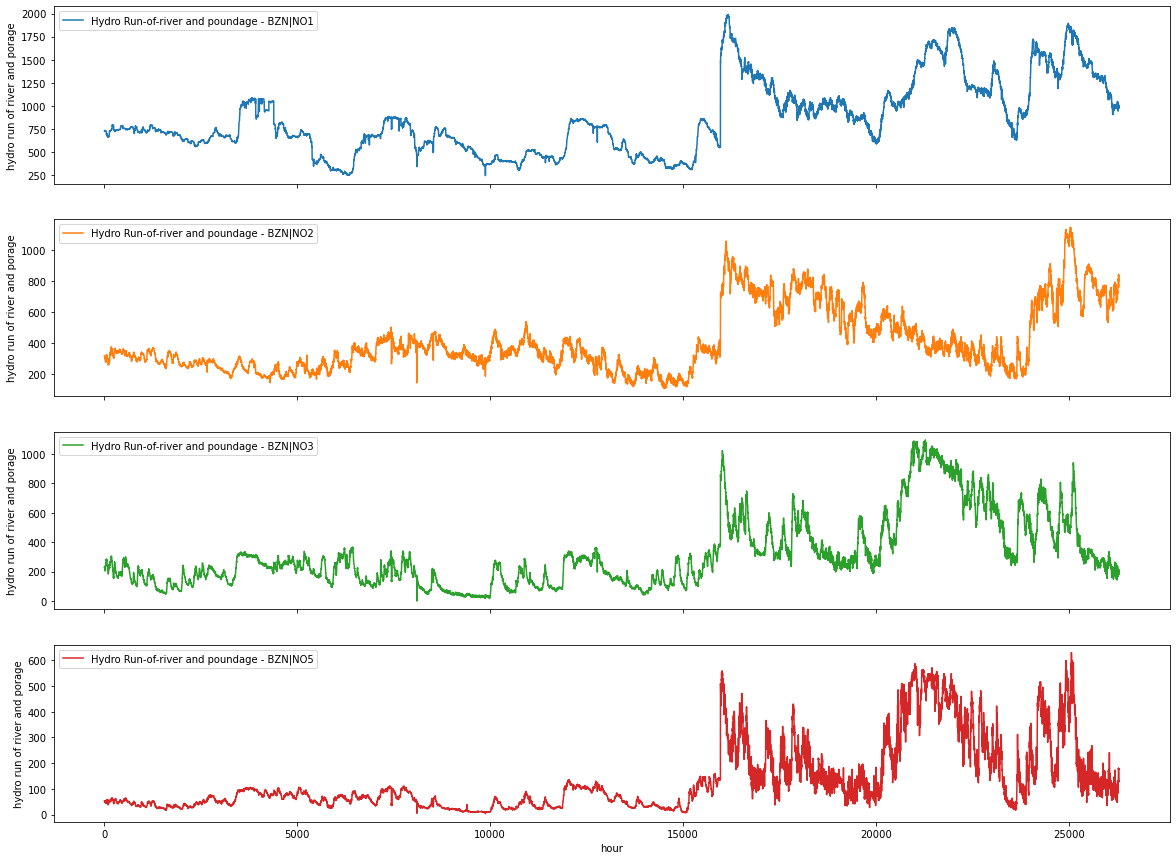

In [41]:
# plotting hydro run of river and porage columns
hydro_run_of_columns.drop(['start MTU (UTC)'], axis=1).plot(subplots=True, figsize=(20, 15),  xlabel='hour', ylabel='hydro run of river and porage')

We can see that the graph is quite jagged, so a linear interpolation is a reasonable option.

In [42]:
# performing splilne inerpolation to fill missing values in hydro run of columns
for col in hydro_run_of_column_names:
    df[col] = df[col].interpolate(option='linear')
# checking if all the missing values in hydro run of columns have been filled:
df.loc[:, hydro_run_of_column_names].isna().sum()

Hydro Run-of-river and poundage - BZN|NO1    0
Hydro Run-of-river and poundage - BZN|NO2    0
Hydro Run-of-river and poundage - BZN|NO3    0
Hydro Run-of-river and poundage - BZN|NO5    0
dtype: int64

We can see the the 'hydro run of' columns no longer conntains any missing values.

### Handling missing values for fossil gas columns

In [43]:
# creating a list of fossil gas column names
fossil_gas_column_names = [col_name for col_name in df.columns if 'Fossil Gas' in col_name]

# creating a new dataframe of fossil gas columns and start datetime
fossil_gas_columns = df.loc[:, fossil_gas_column_names]
fossil_gas_columns.insert(0, 'start MTU (UTC)', df['start MTU (UTC)'])

# checking which rows are missing values for any of the fossil gass columns                             
fossil_gas_columns[fossil_gas_columns[fossil_gas_column_names].isnull().any(1)]

,start MTU (UTC),Fossil Gas - BZN|NO1,Fossil Gas - BZN|NO2,Fossil Gas - BZN|NO3,Fossil Gas - BZN|NO5,Fossil Gas - BZN|SE3
4959,2020-07-25 15:00:00,NaN,NaN,NaN,NaN,0.0
4960,2020-07-25 16:00:00,NaN,NaN,NaN,NaN,0.0
4961,2020-07-25 17:00:00,NaN,NaN,NaN,NaN,0.0
4962,2020-07-25 18:00:00,NaN,NaN,NaN,NaN,0.0
4963,2020-07-25 19:00:00,NaN,NaN,NaN,NaN,0.0
12779,2021-06-16 11:00:00,0.0,NaN,0.0,78.0,0.0
19605,2022-03-27 21:00:00,0.0,0.0,0.0,86.0,NaN


We can se that the first missing values for fossil gas span for a continious interval of 5 hours. The remaining  two missing missing values are interspersed. Since we are dealing with contineous missing values, we opt to use interpolation which generates fill values based on the neighbouring values. To pick an appropriate intorerpolation type we check the graph for the data, and see if the datapoints are more linear in nature (straig lines) or if they seem polynomeal (have a curve):


array([<AxesSubplot:xlabel='hour', ylabel='fossil gass'>,
       <AxesSubplot:xlabel='hour', ylabel='fossil gass'>,
       <AxesSubplot:xlabel='hour', ylabel='fossil gass'>,
       <AxesSubplot:xlabel='hour', ylabel='fossil gass'>,
       <AxesSubplot:xlabel='hour', ylabel='fossil gass'>], dtype=object)

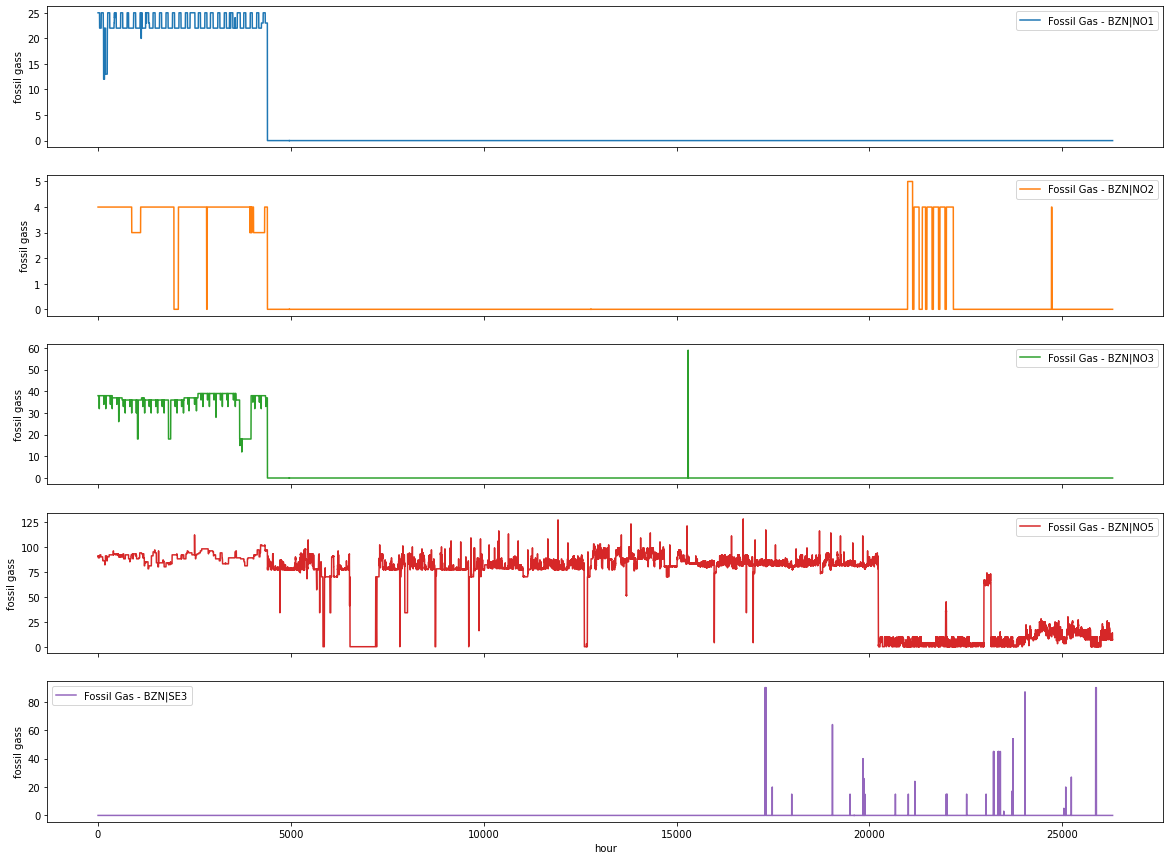

In [44]:
# plotting fossil gas columns
fossil_gas_columns.drop(['start MTU (UTC)'], axis=1).plot(subplots=True, figsize=(20, 15),  xlabel='hour', ylabel='fossil gass')

We can see large periods of no production, and jagged linear shifts in the graphs, so we use linear interploation:

In [45]:
# performing splilne inerpolation to fill missing values in fossil gas columns
for col in fossil_gas_column_names:
    df[col] = df[col].interpolate(option='linear')
    

# checking if all the missing values in fossil gas columns have been filled:
df.loc[:, fossil_gas_column_names].isna().sum()

Fossil Gas - BZN|NO1    0
Fossil Gas - BZN|NO2    0
Fossil Gas - BZN|NO3    0
Fossil Gas - BZN|NO5    0
Fossil Gas - BZN|SE3    0
dtype: int64

We can see the the 'fossil gas' columns no longer conntains any missing values.

### Handling missing values for Hydro Water Reservoir columns.